# Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statistics 
import pandas as pd
from matplotlib.pyplot import figure
import scipy.stats as stats
import seaborn as sns
from matplotlib.pyplot import figure 
from scipy import optimize
from scipy.optimize import curve_fit

# Missions: 

Show and comment on the different results obtained:

- Standard protein: assignment, masses and conclude the stoichiometry for the different concentrations tested at the same instrument conditions.

--> conclusion related to the effect of the concentration on the spectra if present.

- Standard protein: assignment, masses and stoichiometry for the different trap CE voltages tested for the same concentration.

--> conclusion related to the effect of the CE voltage on the spectra if present.

-LukE: assignment, masses and conclude the stoichiometry/form of the protein.

--> conclusion related to the state (conformation, hydrolysis, adducts, etc etc?) of the protein if present.

-LukE + peptide ligand: assignment and masses of the protein/ligand mixture.

--> Do you see binding? how many binding sites per protein? what is the mass of the ligand? 




# Standard protein

In [2]:
df = pd.read_csv("data/CONCA_12uM_smooth50.txt",sep="\t") #open the text file as table
df

,x,y
0,500,16.81
1,500,16.49
2,500,16.19
3,500,15.89
4,500,15.61
...,...,...
353310,10000,1.00
353311,10000,1.00
353312,10000,1.00
353313,10000,1.00


assignment, masses and conclude the stoichiometry for the different concentrations tested at the same instrument conditions.

## Asignment and masses 

In [3]:
# define a gaussian function and a function that sums multiple gaussian to be able too fit multiple gaussians

def gaussian(x, height, center, width, offset):
    return height*np.exp(-(x - center)**2/(2*width**2)) + offset
def three_gaussians(x, h1, c1, w1, h2, c2, w2, h3, c3, w3, offset):
    return (gaussian(x, h1, c1, w1, offset=0) +
        gaussian(x, h2, c2, w2, offset=0) +
        gaussian(x, h3, c3, w3, offset=0) + offset)

In [4]:
# the curv_fit program is a minimization program to find the best parameters of the gaussian function so that it fits the data the best
# we added bounds which are inital guesses to speed up the computation time
popt, pcov = curve_fit(three_gaussians, df.x, df.y/np.max(df.y)*100,bounds=([0.40, 2400, 200, 0.8, 3600, 200, 0.3, 5000,200, 0],[0.60, 2600, 300, 1, 3900, 500, 0.5, 5400,300, 0.1]))

#note that we are fitting the abundance, thus scaling the data by dividing by the maximum value

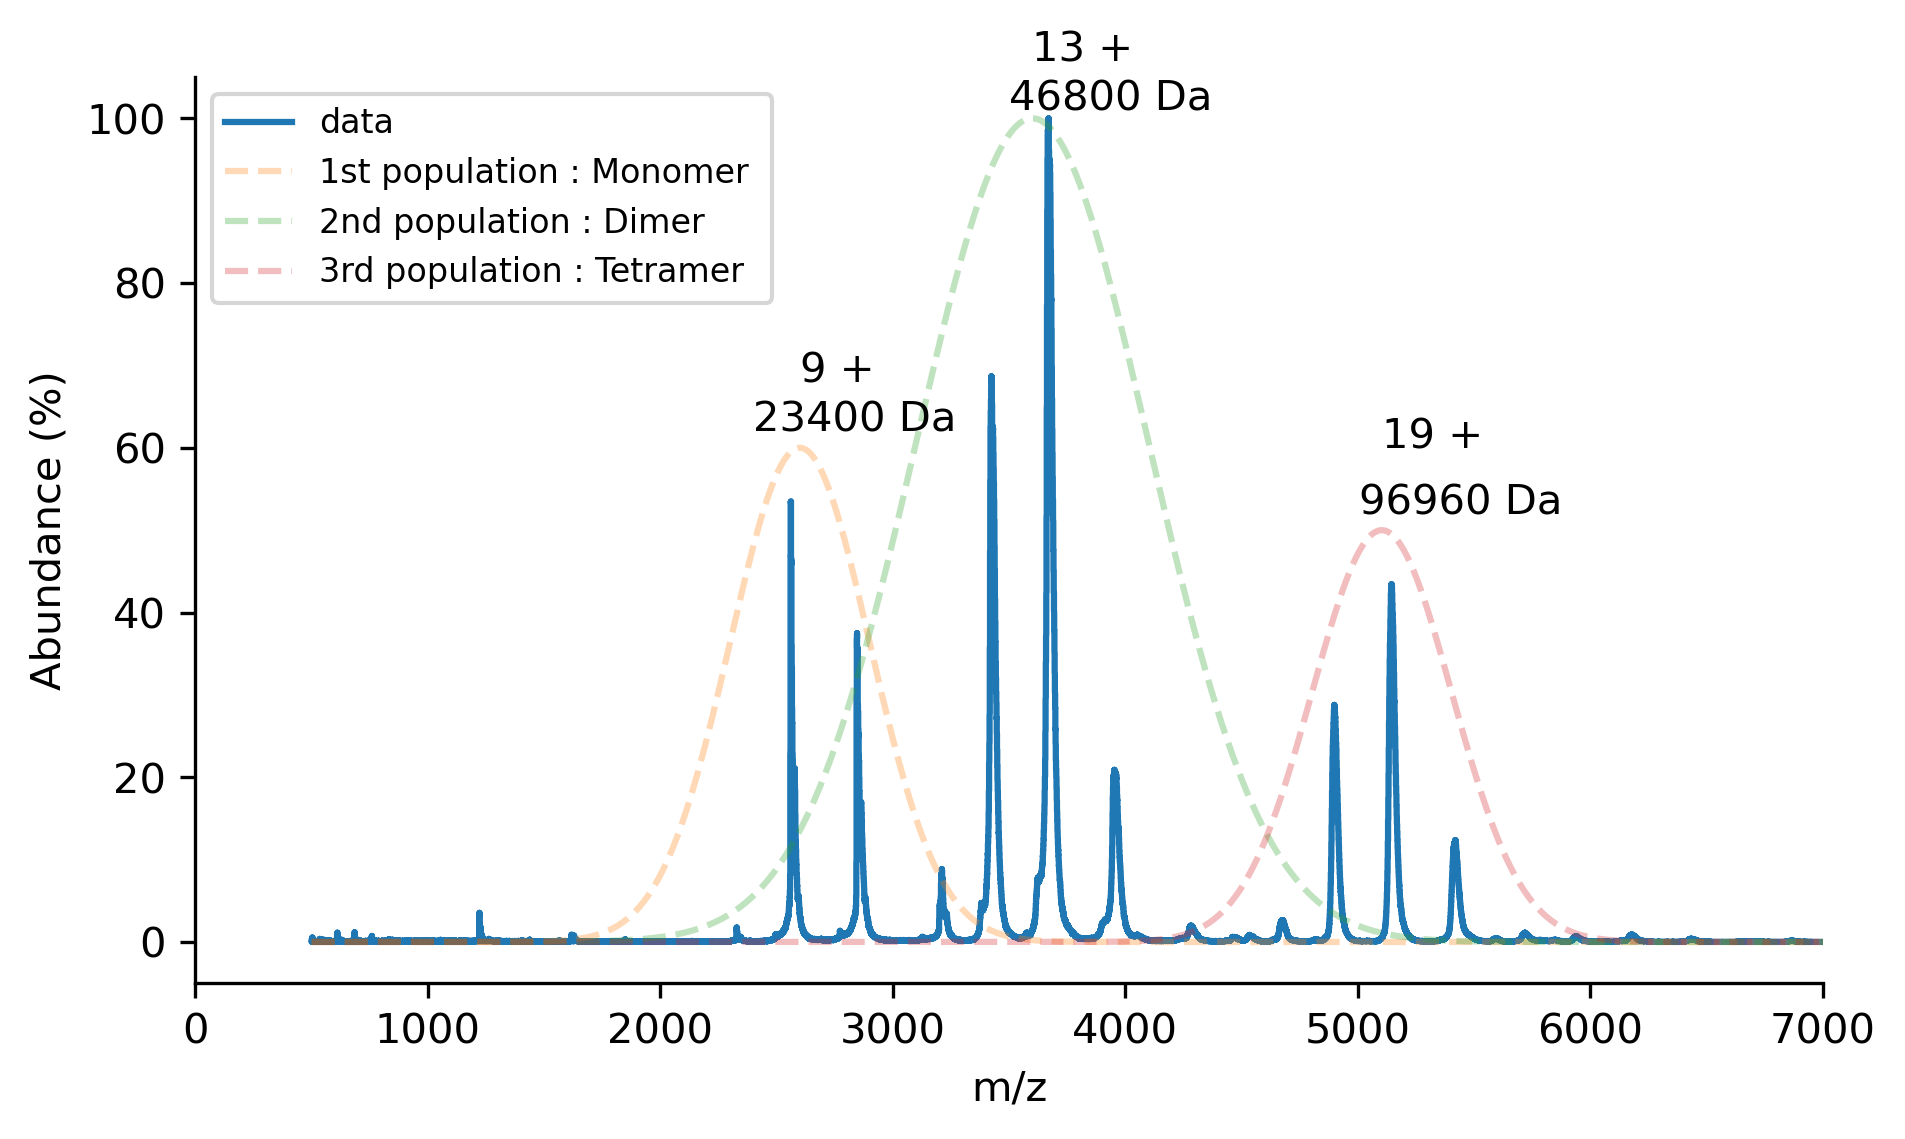

In [5]:
#plotting parameters

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams["figure.dpi"] = 300
figure(figsize= [7, 4])

#------------------------------------------------------

#charge states
#set for the middle peak of the distribution

charge_state_mono = round(2562/(2846-2562))
charge_state_dim = round(3670/(3953-3670))
charge_state_tetr = round(5145/(5420-5145))

#------------------------------------------------------

# Plotting 

#plot using the parameters found by the minimization 

plt.plot(df.x,(df.y/np.max(df.y))*100,label="data")
plt.plot(df.x,gaussian(df.x,popt[0],popt[1],popt[2],0)*100,'--',label="1st population : Monomer ",alpha=0.3)
plt.plot(df.x,gaussian(df.x,popt[3],popt[4],popt[5],0)*100,'--',label="2nd population : Dimer",alpha=0.3)
plt.plot(df.x,gaussian(df.x,popt[6],popt[7],popt[8],0)*100,'--',label="3rd population : Tetramer",alpha=0.3)

#------------------------------------------------------

#text

plt.text(popt[1]-200,62,str(round((popt[1]*charge_state_mono)))+' Da')
plt.text(popt[4]-100,101,str(round((popt[4]*charge_state_dim)))+' Da')
plt.text(popt[7]-100,52,str(round((popt[7]*charge_state_tetr)))+' Da')
plt.text(popt[1],68,str(charge_state_mono)+ ' +')
plt.text(popt[4],107,str(charge_state_dim)+ ' +')
plt.text(popt[7],60,str(charge_state_tetr)+ ' +')

#------------------------------------------------------

#legend 

plt.legend(loc="upper left",prop={'size': 8})
plt.xlim(0,7000)
plt.xlabel("m/z")
plt.ylabel("Abundance (%)")
#plt.tight_layout()

#------------------------------------------------------

#saving

#plt.savefig("plots/Assignment_masses_standard.png")
plt.show()

## Representation of the adducts

In [7]:
df8 = df.truncate(before=df[df['x']==2300].index.values[0],after=df[df['x']==3250].index.values[0]) #truncate the dataframe to "zoom" on a specific region

#print(df8[df8['x']==np.max(df8.x)].values)

#that is to add 0 before and after the data for better plotting

for i in range(400):
    df8.loc[df8.shape[0]] = [3250+i,0] 
    

x = [i for i in range(2000,np.min(df8.x))]
y = np.zeros(len(x))
d = {'x':x,'y':y}

#--------------------------------------

dft = pd.DataFrame(d)

df8 = pd.concat([dft, df8], ignore_index = False, axis = 0)

df8.head()

,x,y
0,2000,0.0
1,2001,0.0
2,2002,0.0
3,2003,0.0
4,2004,0.0


In [8]:
popt_a, pcov_a = curve_fit(three_gaussians, df8.x, df8.y/np.max(df8.y)*100,bounds=([0.80, 2450, 200, 0.3, 2570, 200, 0.2, 3000,200, 0],[1, 2520, 500, 0.5, 2600, 600, 0.4, 3200,400, 0.1]))

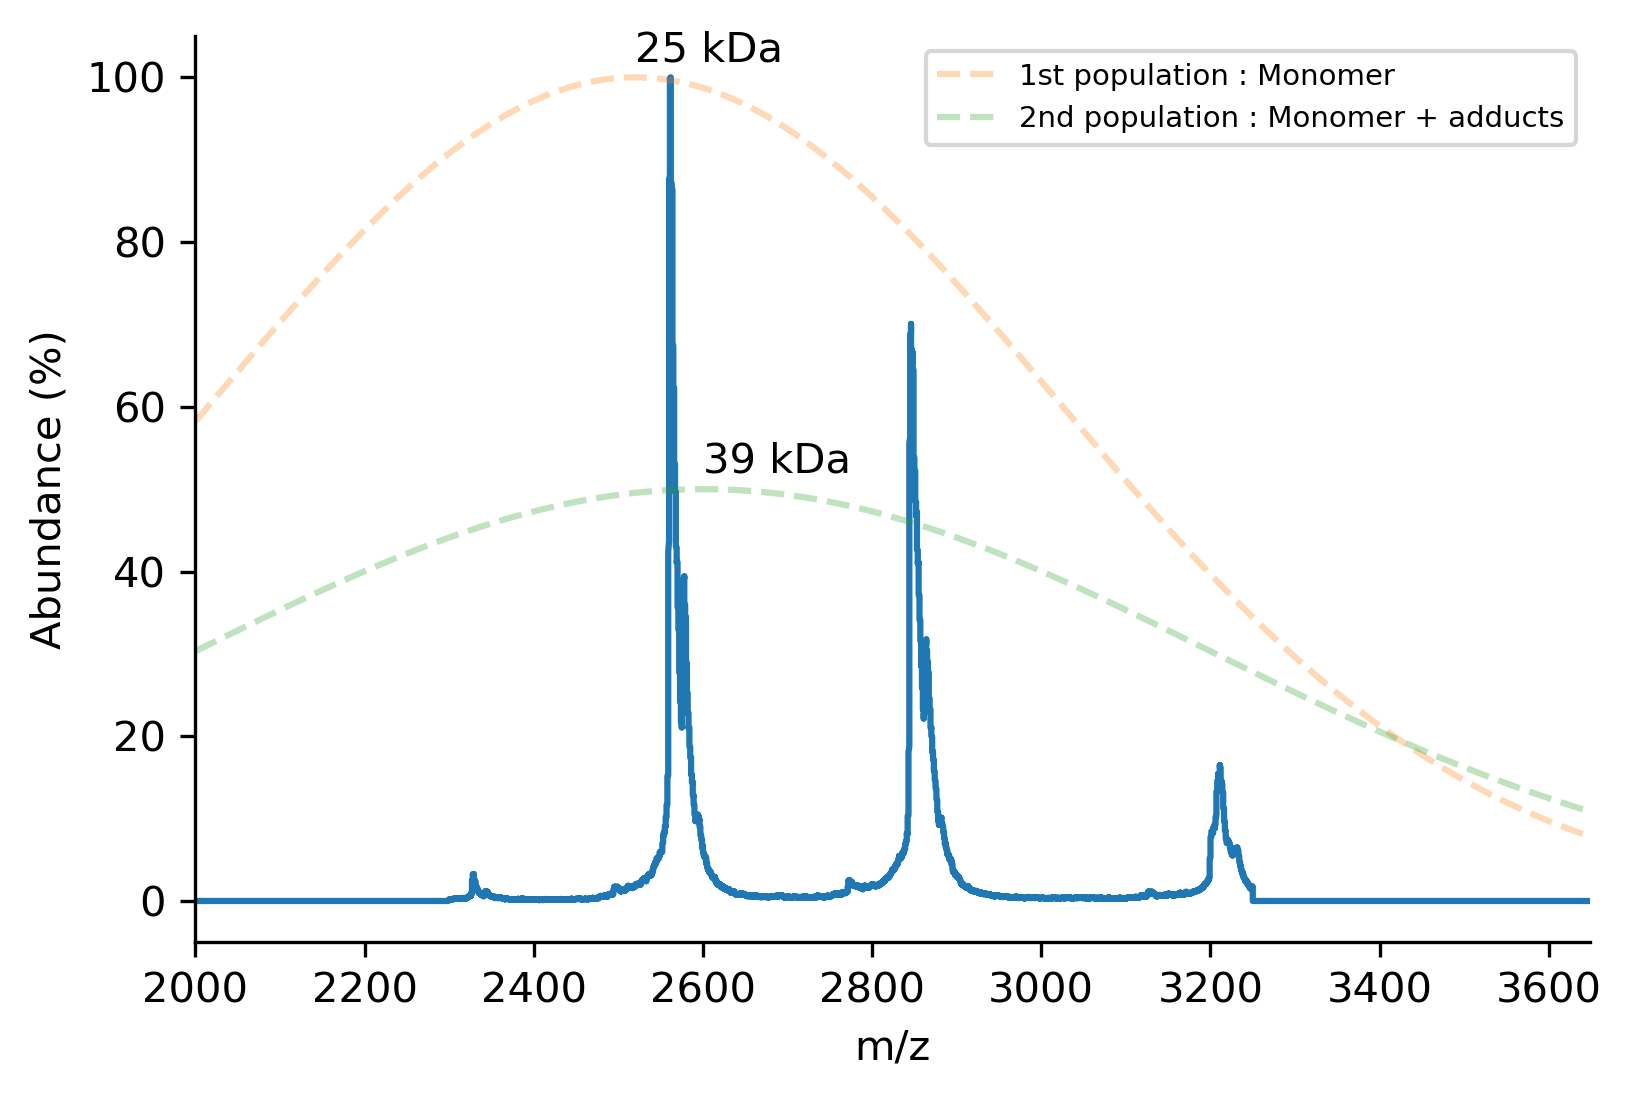

In [9]:

plt.plot(df8.x,df8.y/np.max(df8.y)*100)
plt.plot(df8.x,gaussian(df8.x,popt_a[0],popt_a[1],popt_a[2],0)*100,'--',label="1st population : Monomer",alpha=0.3)
plt.plot(df8.x,gaussian(df8.x,popt_a[3],popt_a[4],popt_a[5],0)*100,'--',label="2nd population : Monomer + adducts",alpha=0.3)


plt.text(popt_a[1],102,str(round((popt_a[1]*10)/1000))+' kDa')
plt.text(popt_a[4],52,str(round((popt_a[4]*15)/1000))+' kDa')

plt.xlim(np.min(df8.x),np.max(df8.x))
plt.legend(loc='best',prop={'size': 7})
plt.xlabel("m/z")
plt.ylabel("Abundance (%)")

#plt.savefig('plots/Adducts_conca.svg')

plt.show()

## Effet of concentration on spectra

In [10]:
df7 = pd.read_csv("data/CONCA_50uM_smooth50.txt",sep="\t")
df7

,x,y
0,500,133.800
1,500,131.300
2,500,128.800
3,500,126.900
4,500,124.700
...,...,...
306389,8000,1.871
306390,8000,1.871
306391,8000,1.871
306392,8000,1.960


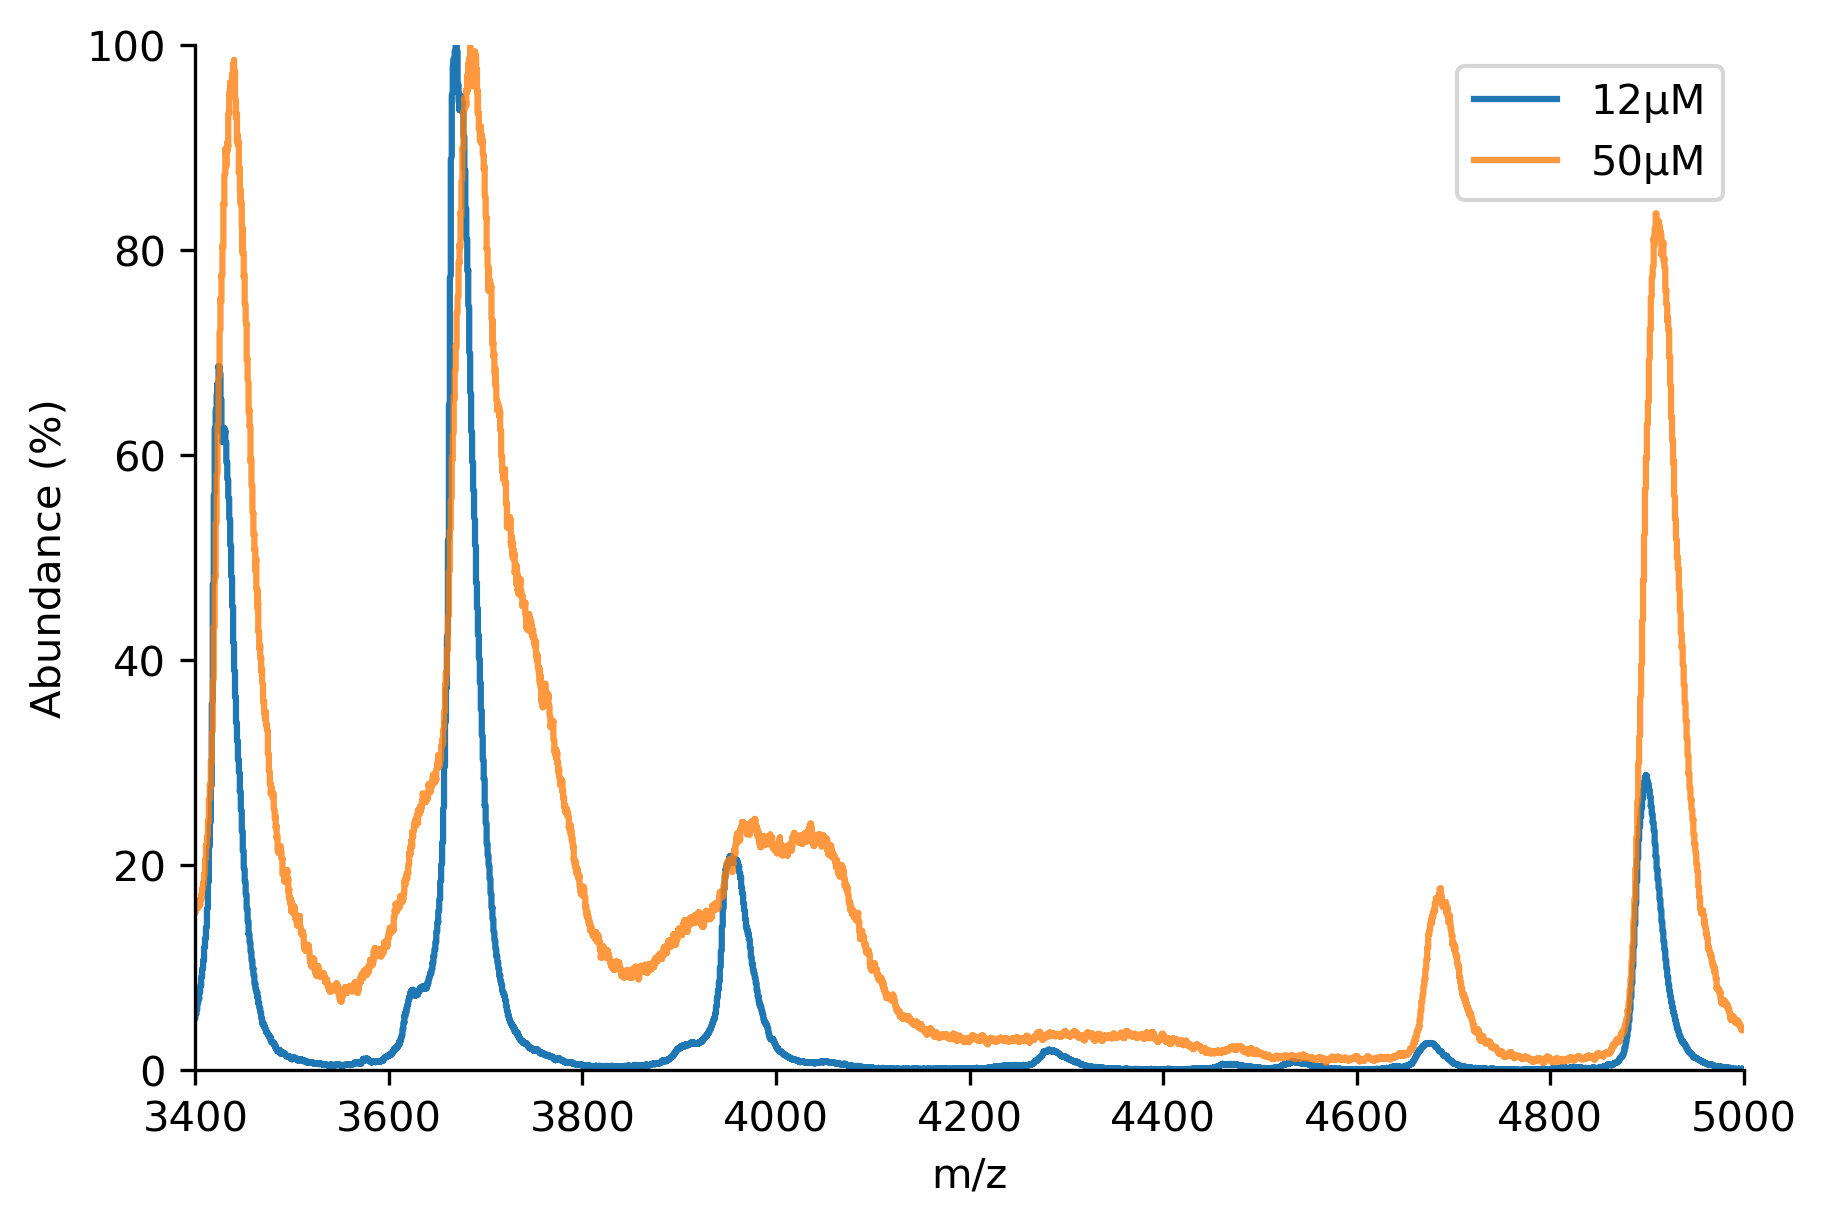

In [11]:
plt.plot(df.x,df.y/np.max(df.y)*100,label="12µM")
plt.plot(df7.x,df7.y/np.max(df7.y)*100,label="50µM",alpha=0.8)
plt.legend(loc="best")
plt.xlim(3400,5000)
plt.ylim(0,100)
plt.tight_layout()
plt.xlabel("m/z")
plt.ylabel("Abundance (%)")
#plt.savefig('plots/effect_concentration_conca.svg')
plt.show()

## Effect on the CE voltage on spectra

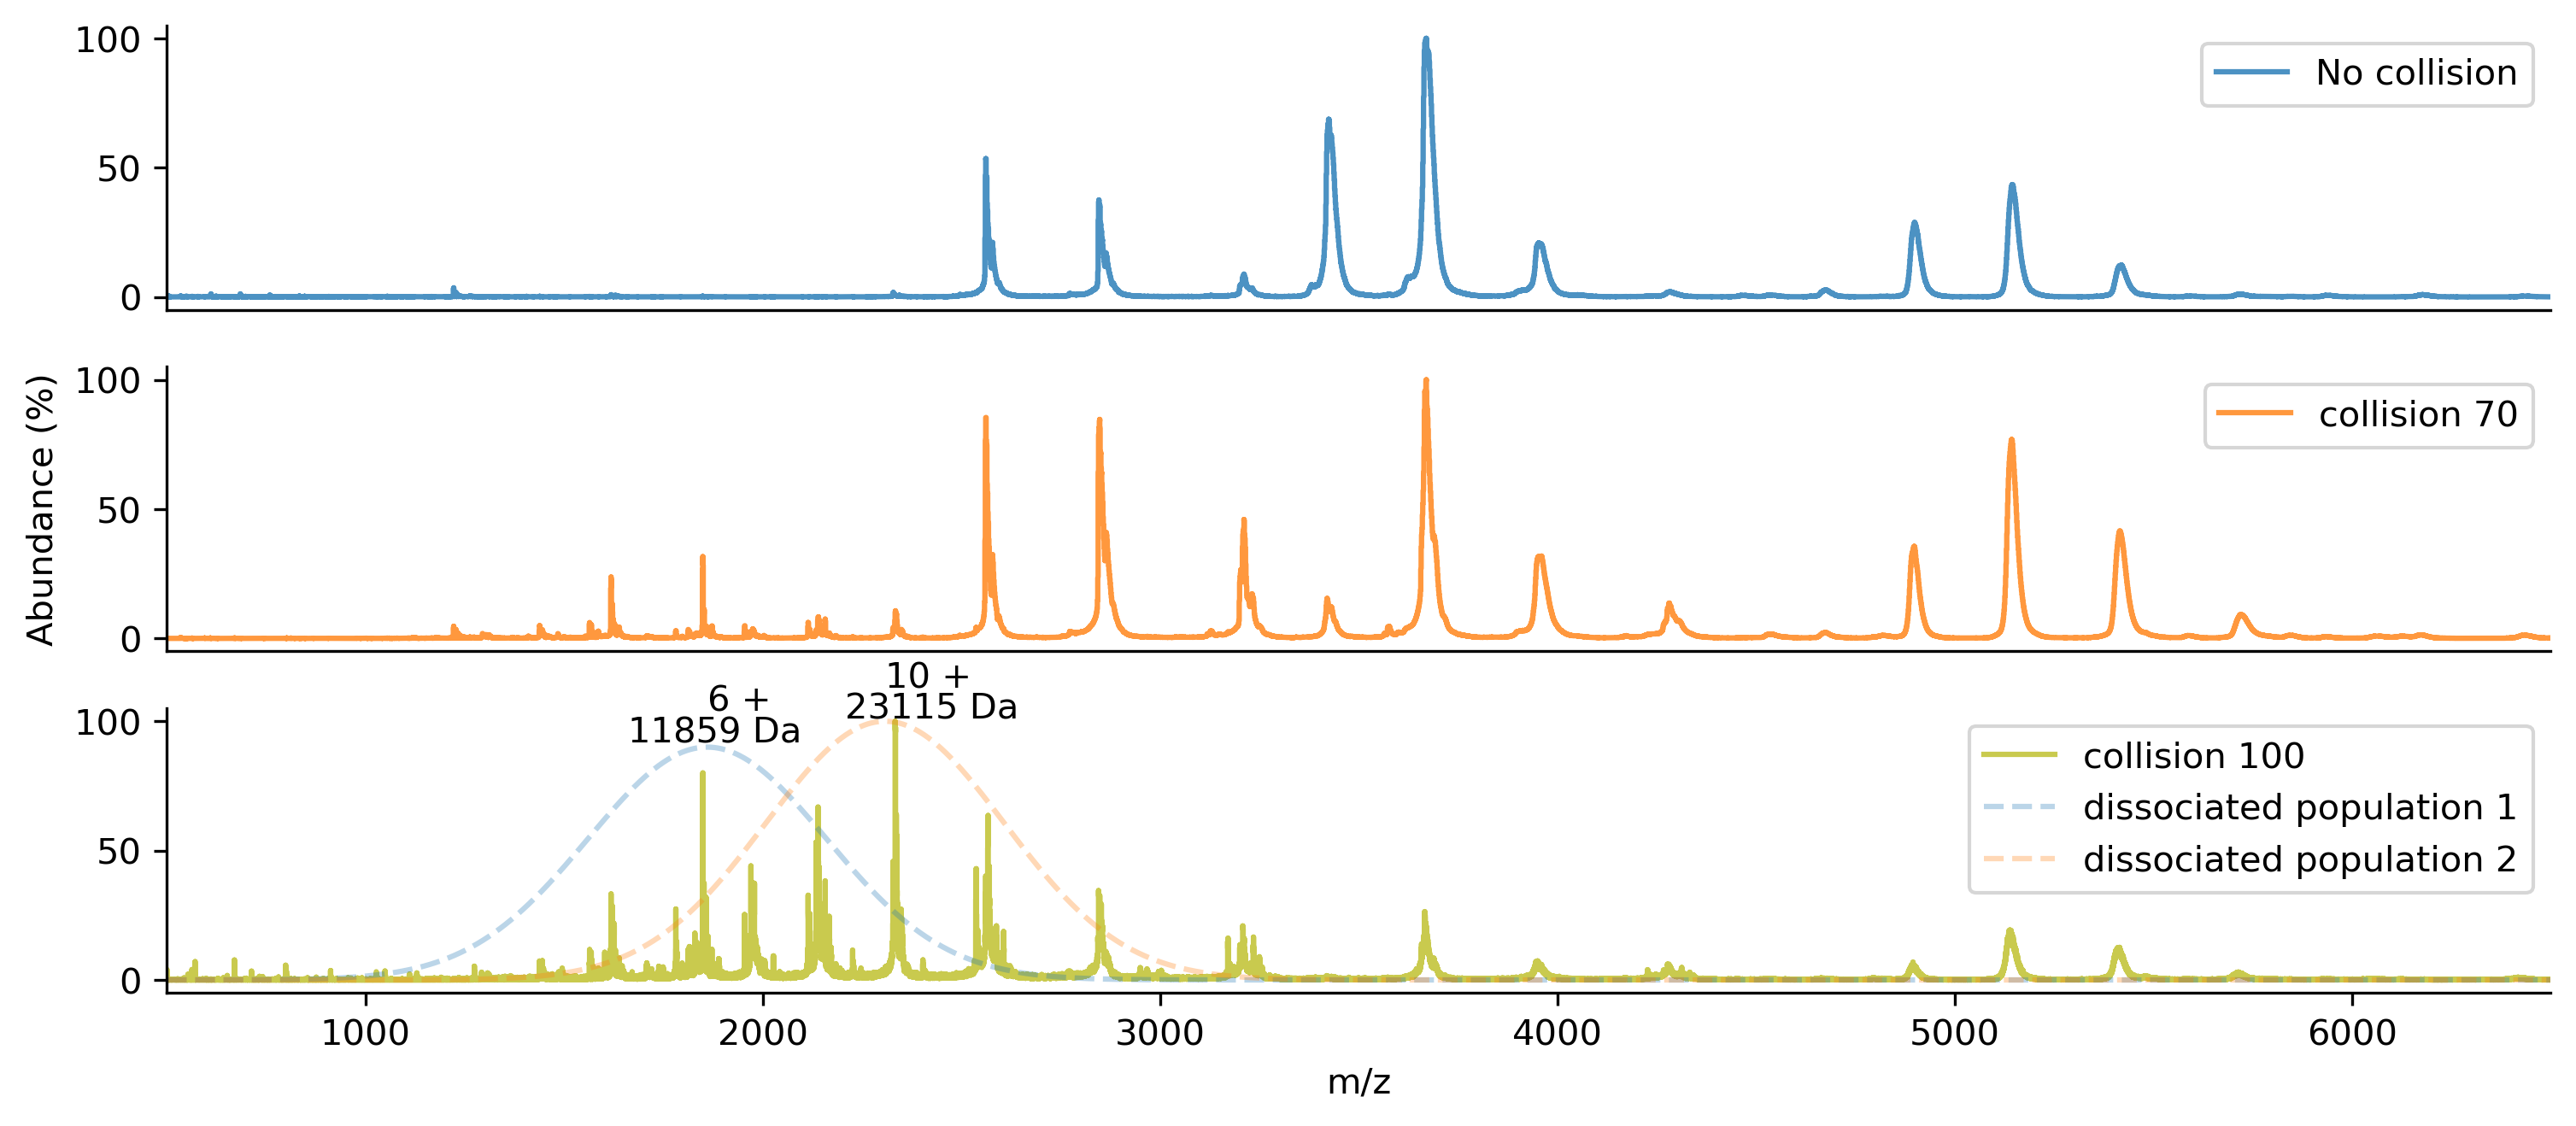

In [12]:
#here I define a function that will automatically open the file and return me a dataframe which should be done earlier in the notebook

def openfct(p,path,label,color):
    df = pd.read_csv(path,sep="\t")
    if p =='yes':
        plt.plot(df.x,df.y/np.max(df.y)*100,label=label,alpha=0.8,color=color)
        plt.xlim(500,6500)
    #plt.show()
    
    return df

#create a list of file that will be opened one by one 

figure(figsize=(12,5))
files = ["data/conca_1.txt","data/conca_2.txt","data/conca_3.txt","data/conca_4.txt","data/conca_5.txt","data/conca_6.txt","data/conca_7.txt"]
files_bis = ["data/CONCA_12uM_smooth50.txt","data/conca_4.txt","data/conca_7.txt"]
counter = 1 

label = ["0","No collision","collision 70","collision 100"]
color = [0,"tab:blue","tab:orange","tab:olive"]
for i in files_bis:
    plt.subplot(3,1,counter)

    openfct('yes',i,label[counter],color[counter])
    counter += 1
    
    plt.legend()
    if counter != 4:
        plt.xticks([])
    if counter == 3:
        plt.ylabel("Abundance (%)")
        
plt.xlabel("m/z")

# fit a guassian for the last plot 

m = openfct('e',files_bis[-1],label[-1],color[-1])
popt, pcov = curve_fit(three_gaussians, m.x, m.y/np.max(m.y)*100,bounds=([0.70, 1800, 100,0.8,2275,100,0.8,4000,100,0],[0.9, 1860,300,1,2400,300,1,4500,300,0.1]))
plt.plot(m.x,gaussian(m.x,popt[0],popt[1],popt[2],0)*100,'--',alpha=0.3,label="dissociated population 1")
plt.plot(m.x,gaussian(m.x,popt[3],popt[4],popt[5],0)*100,'--',alpha=0.3,label="dissociated population 2")

charge = (1849)/(2139-1849)
charge_2 = 2334/(2567-2334)

plt.text(popt[1]-200,92,str(round((popt[1]*charge)))+' Da')
plt.text(popt[4]-100,101,str(round((popt[4]*charge_2)))+' Da')
plt.text(popt[1],104,str(round(charge))+ ' +')
plt.text(popt[4],113,str(round(charge_2))+ ' +')

plt.legend()


#plt.savefig("plots/effect of trap voltage.png",dpi=400)

plt.show()    

In [31]:
charge = (1849)/(2139-1849)
charge_2 = 2334/(2567-2334)

print(popt[1]*charge)
print(popt[4]*charge_2)
print(charge,charge_2)

11859.103448275855
23114.916937916903
6.375862068965517 10.017167381974248


# LukE

In [15]:
def openfct_luk(path,pl):
    df = pd.read_csv(path,sep="\t")
    
    if pl == 'yes':
        
        plt.plot(df.x,df.y/np.max(df.y)*100)
        #plt.xlim(2500,3500)
        plt.show()
    
    return df

# Monomer , monomer + adducts 

In [16]:
# define a function that will automatically do the fitting (same method as before) but directly which also should have been done before
def fitting(data,params):
    
    h1 = [params[0],params[1]]
    c1 = [params[2],params[3]]
    w1 = [params[4],params[5]]
    h2 = [params[6],params[7]]
    c2 = [params[8],params[9]]
    w2 = [params[10],params[11]]
    h3 = [params[12],params[13]]
    c3 = [params[14],params[15]]
    w3 = [params[16],params[17]]
    offset = [params[18],params[19]]
    
    popt, pcov = curve_fit(three_gaussians, data.x, data.y/np.max(data.y)*100,
                               bounds=([h1[0],c1[0],w1[0],h2[0],c2[0],w2[0],h3[0],c3[0],w3[0],offset[0]],
                                       [h1[1],c1[1],w1[1],h2[1],c2[1],w2[1],h3[1],c3[1],w3[1],offset[1]]))
    
    return popt
    

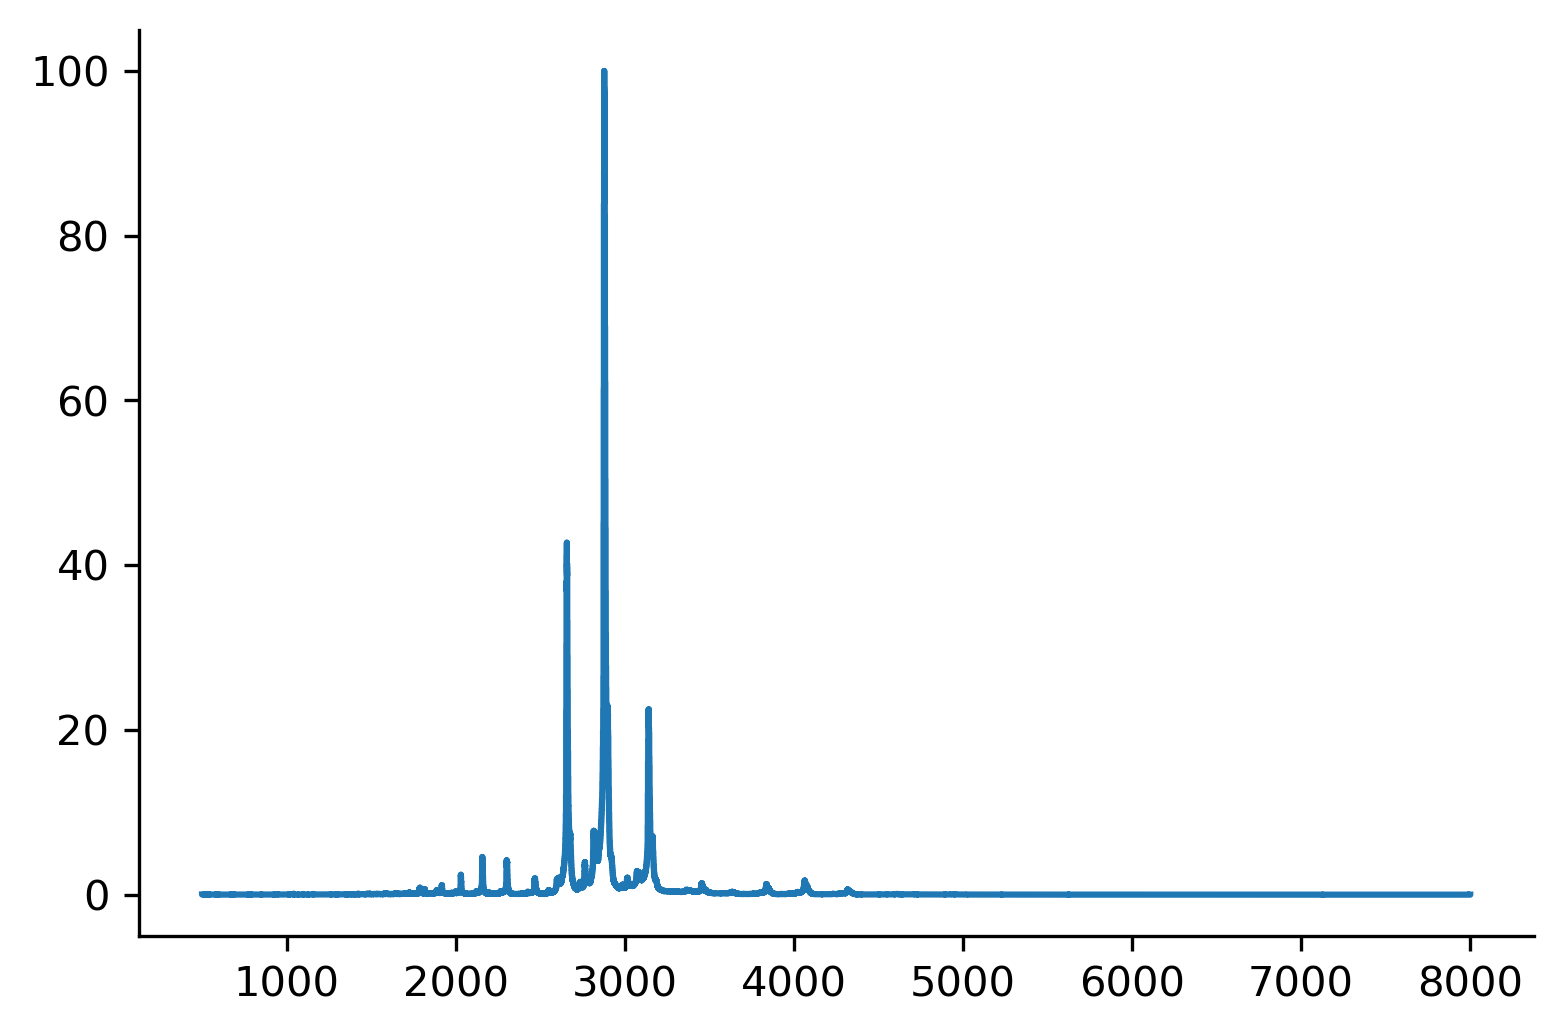

,x,y
0,500,149.6
1,500,146.9
2,500,144.2
3,500,141.6
4,500,139.1


In [17]:
file = "data/luke_50.txt"

luke = openfct_luk(file,'yes')
luke.head()

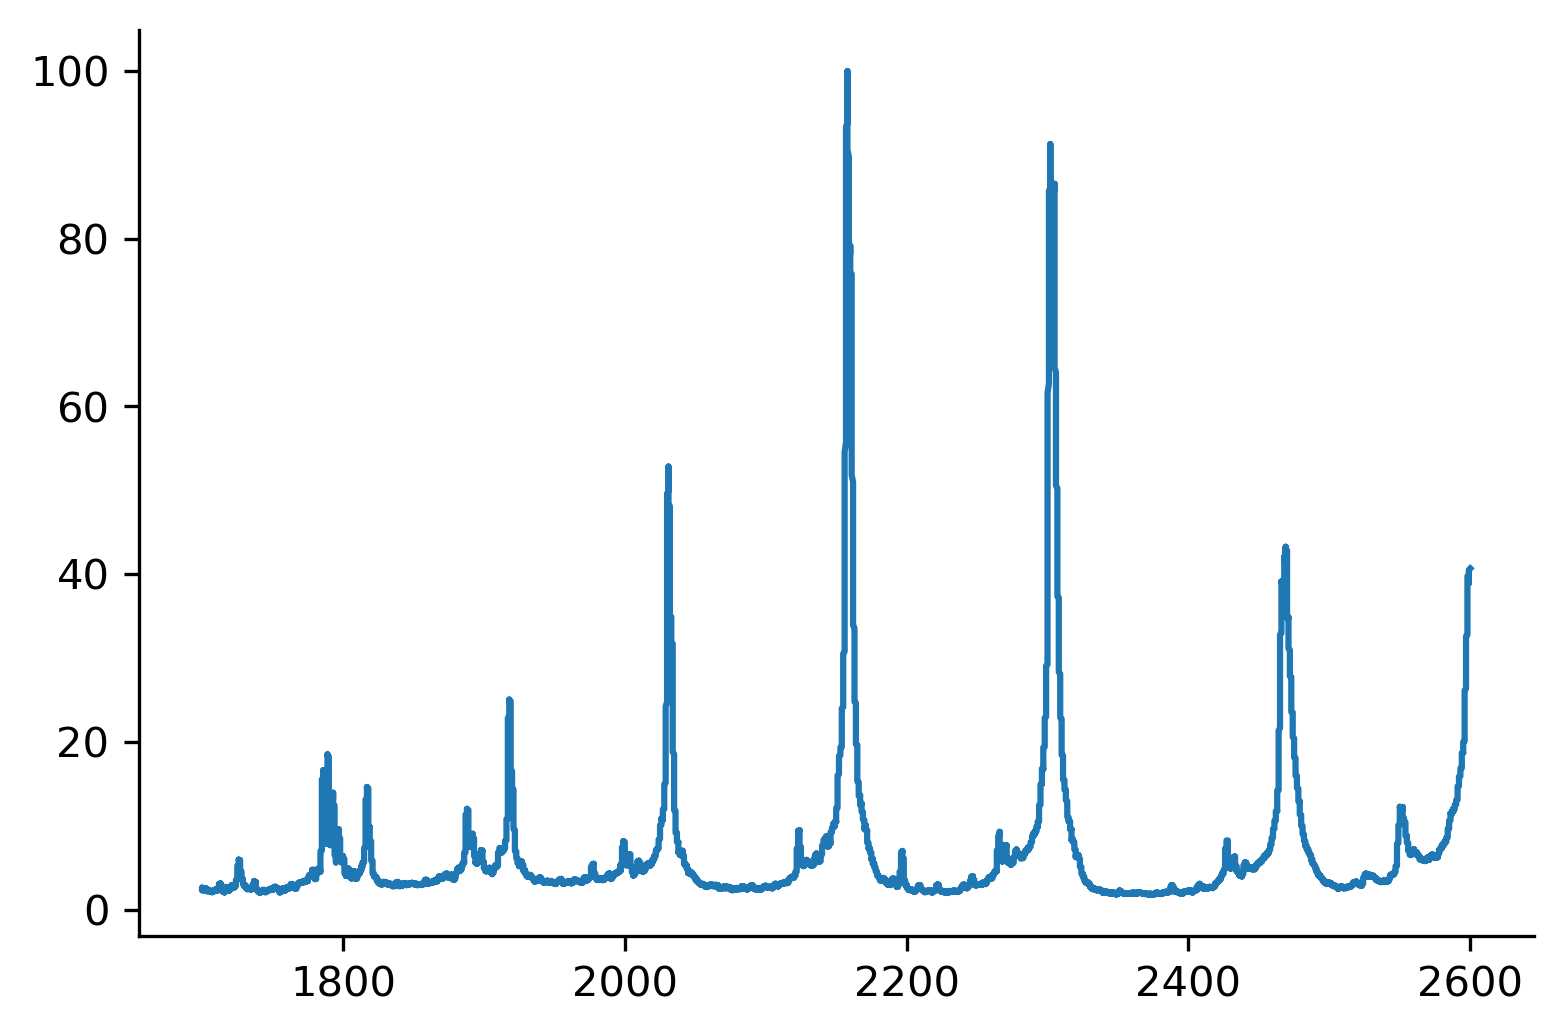

In [18]:
luk_mono_1 = luke.truncate(before=luke[luke['x']==1700].index.values[0],after=luke[luke['x']==2600].index.values[0])
plt.plot(luk_mono_1.x,(luk_mono_1.y/max(luk_mono_1.y))*100)

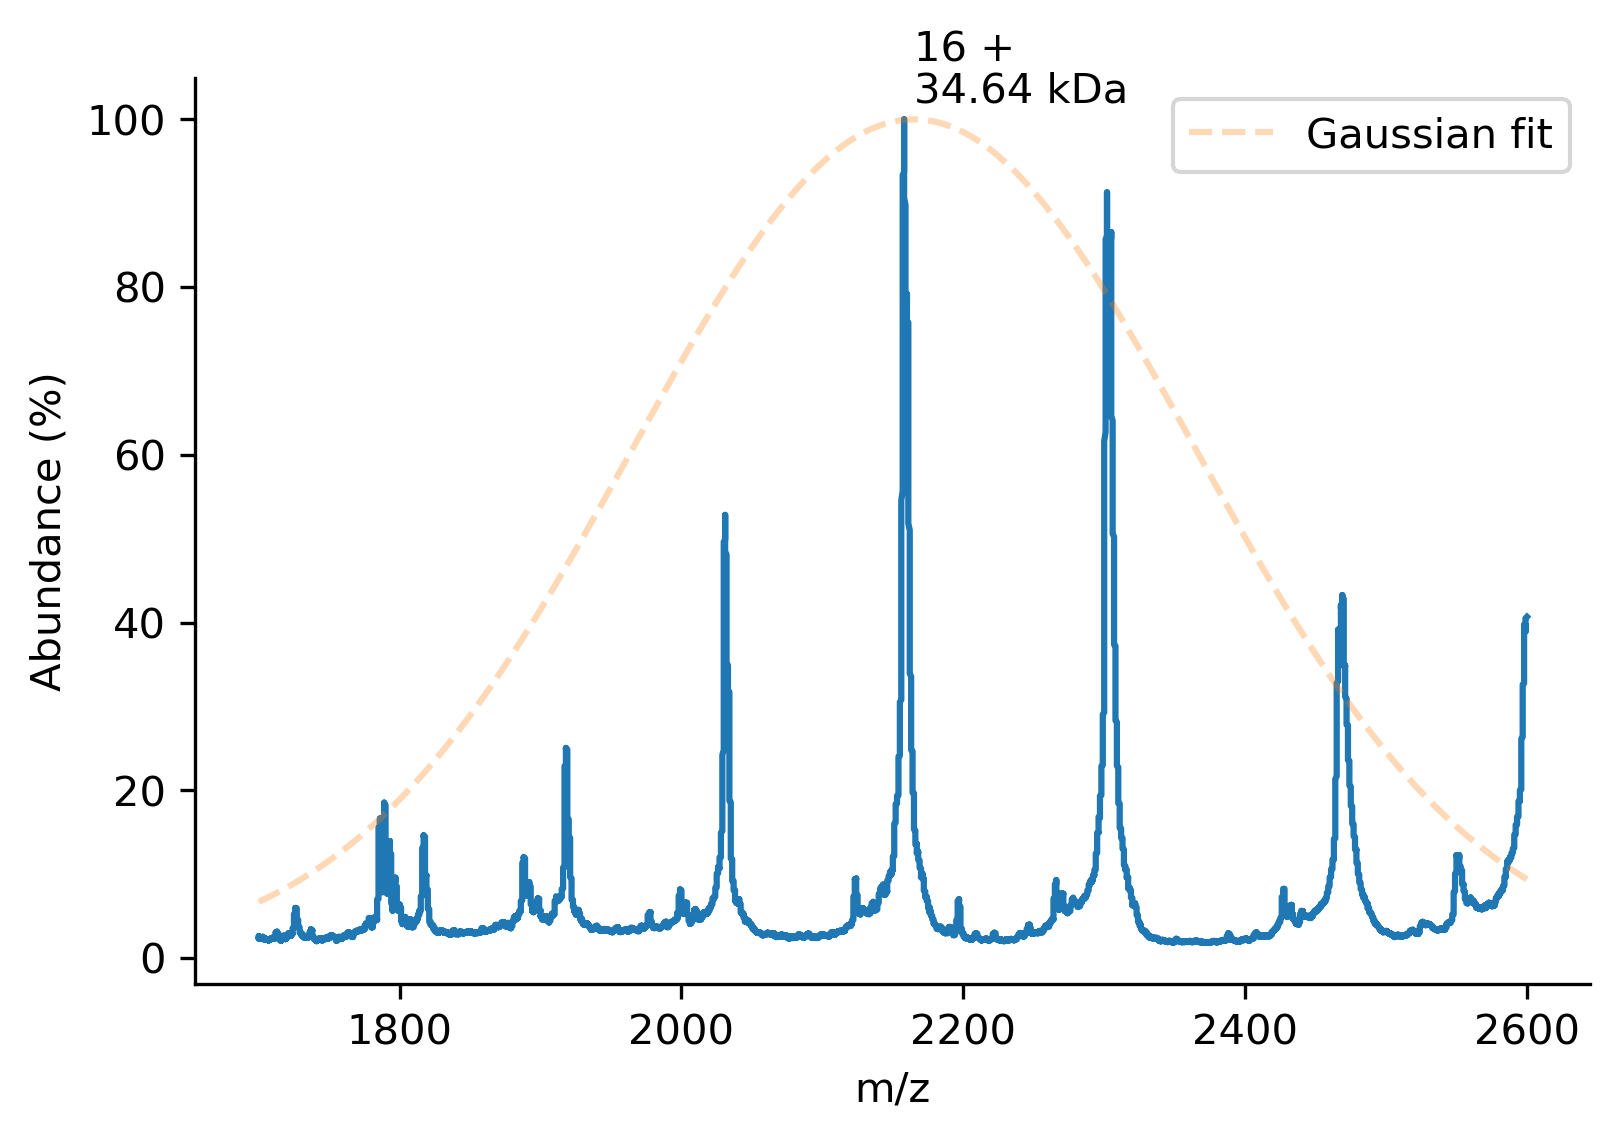

In [36]:
params = [0.8,1,2100,2165,100,200,0,0.1,1000,1050,200,400,0.2,0.3,2350,2400,200,400,0,0.1]
fit_mono_1 = fitting(luk_mono_1,params)

charge_state= round(2031/(2158-2031))
plt.plot(luk_mono_1.x,(luk_mono_1.y/max(luk_mono_1.y))*100)
plt.plot(luk_mono_1.x,gaussian(luk_mono_1.x,fit_mono_1[0],fit_mono_1[1],fit_mono_1[2],0)*100,'--',label="Gaussian fit",alpha=0.3)

plt.text(fit_mono_1[1],107,str(charge_state)+' +')
plt.text(fit_mono_1[1],102,str(round((fit_mono_1[1]*charge_state)/1000,2))+' kDa')

plt.xlabel("m/z")
plt.ylabel("Abundance (%)")
plt.legend()
plt.savefig("plots/luk_monomer_1.svg")
plt.show()


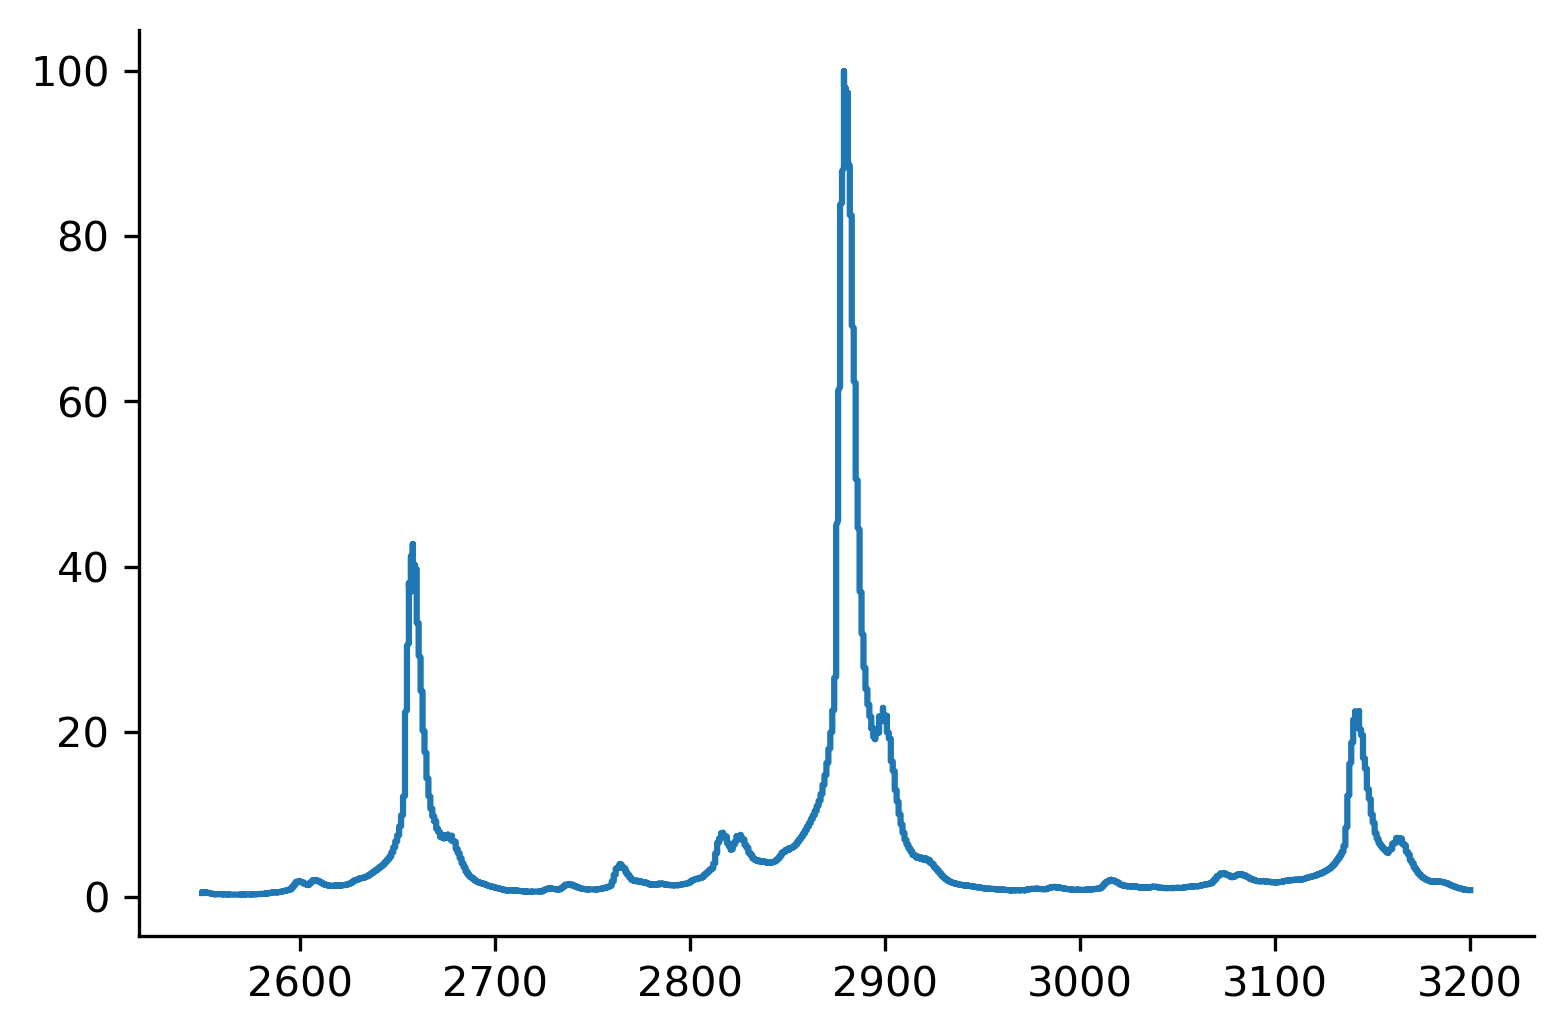

In [20]:
luk_mono_2 = luke.truncate(before=luke[luke['x']==2550].index.values[0],after=luke[luke['x']==3200].index.values[0])
plt.plot(luk_mono_2.x,(luk_mono_2.y/max(luk_mono_2.y))*100)

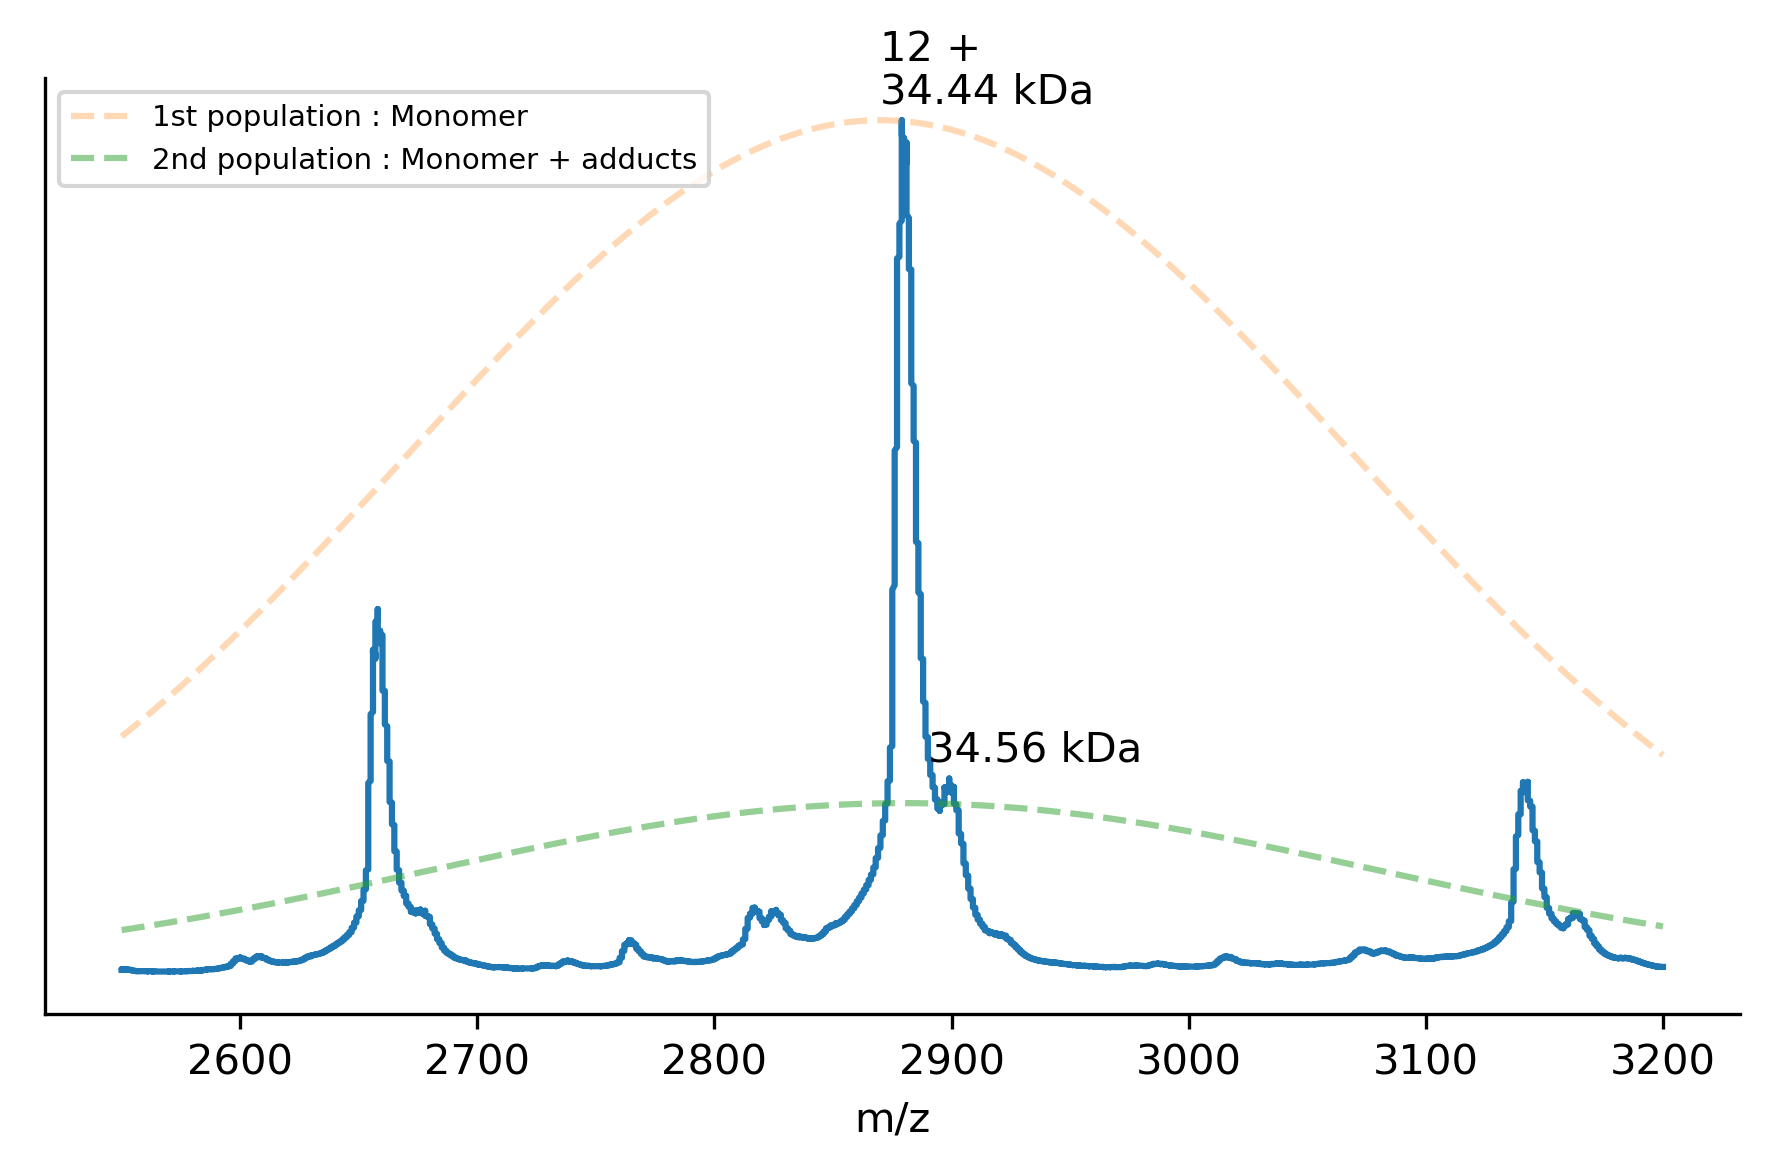

In [40]:
params = [0.8,1,2870,2890,100,200,0.1,0.2,2880,2950,100,200,0.2,0.3,2350,2400,200,400,0,0.1]
fit_mono_2 = fitting(luk_mono_2,params)

charge_state_1 = round(2655/(2877-2655))

plt.plot(luk_mono_2.x,(luk_mono_2.y/max(luk_mono_2.y))*100)
plt.plot(luk_mono_2.x,gaussian(luk_mono_2.x,fit_mono_2[0],fit_mono_2[1],fit_mono_2[2],0)*100,'--',label="1st population : Monomer",alpha=0.3)
plt.plot(luk_mono_2.x,gaussian(luk_mono_2.x,fit_mono_2[3],fit_mono_2[4],fit_mono_2[5],0)*100,'--',label="2nd population : Monomer + adducts",alpha=0.5)

plt.text(fit_mono_2[1],107,str(charge_state_1)+' +')
plt.text(fit_mono_2[1],102,str(round((fit_mono_2[1]*(charge_state_1))/1000,2))+' kDa')
plt.text(fit_mono_2[4]+10,25,str(round((fit_mono_2[4]*charge_state_1)/1000,2))+' kDa')

plt.xlabel("m/z")
plt.yticks([])
#plt.ylabel("Abundance (%)")
plt.legend(loc='upper left',prop={'size': 7})
plt.tight_layout()
#plt.savefig("plots/luk_monomer_2.svg")

plt.show()


We see that there are 2 populations at different m/z but that have the same weight, in the second population (higher m/z) we have adducts

## Dimer , dimer + adducts 

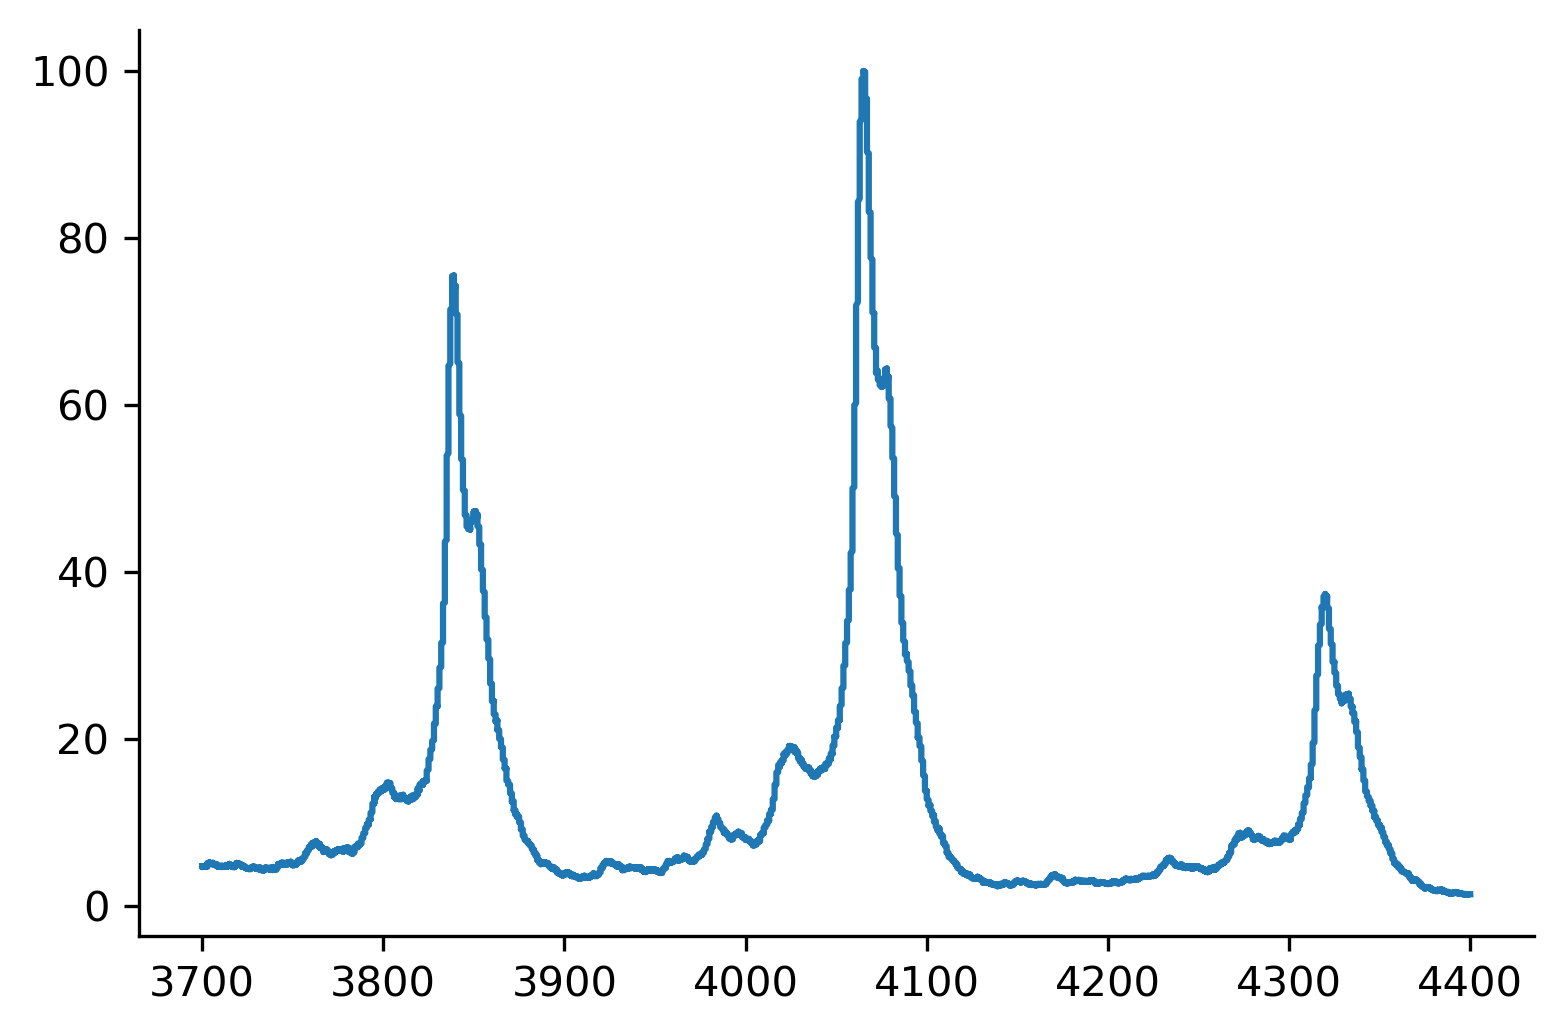

In [42]:
luk_dim = luke.truncate(before=luke[luke['x']==3700].index.values[0],after=luke[luke['x']==4400].index.values[0])
plt.plot(luk_dim.x,(luk_dim.y/max(luk_dim.y))*100)
#plt.vlines(4070,0,100)

17


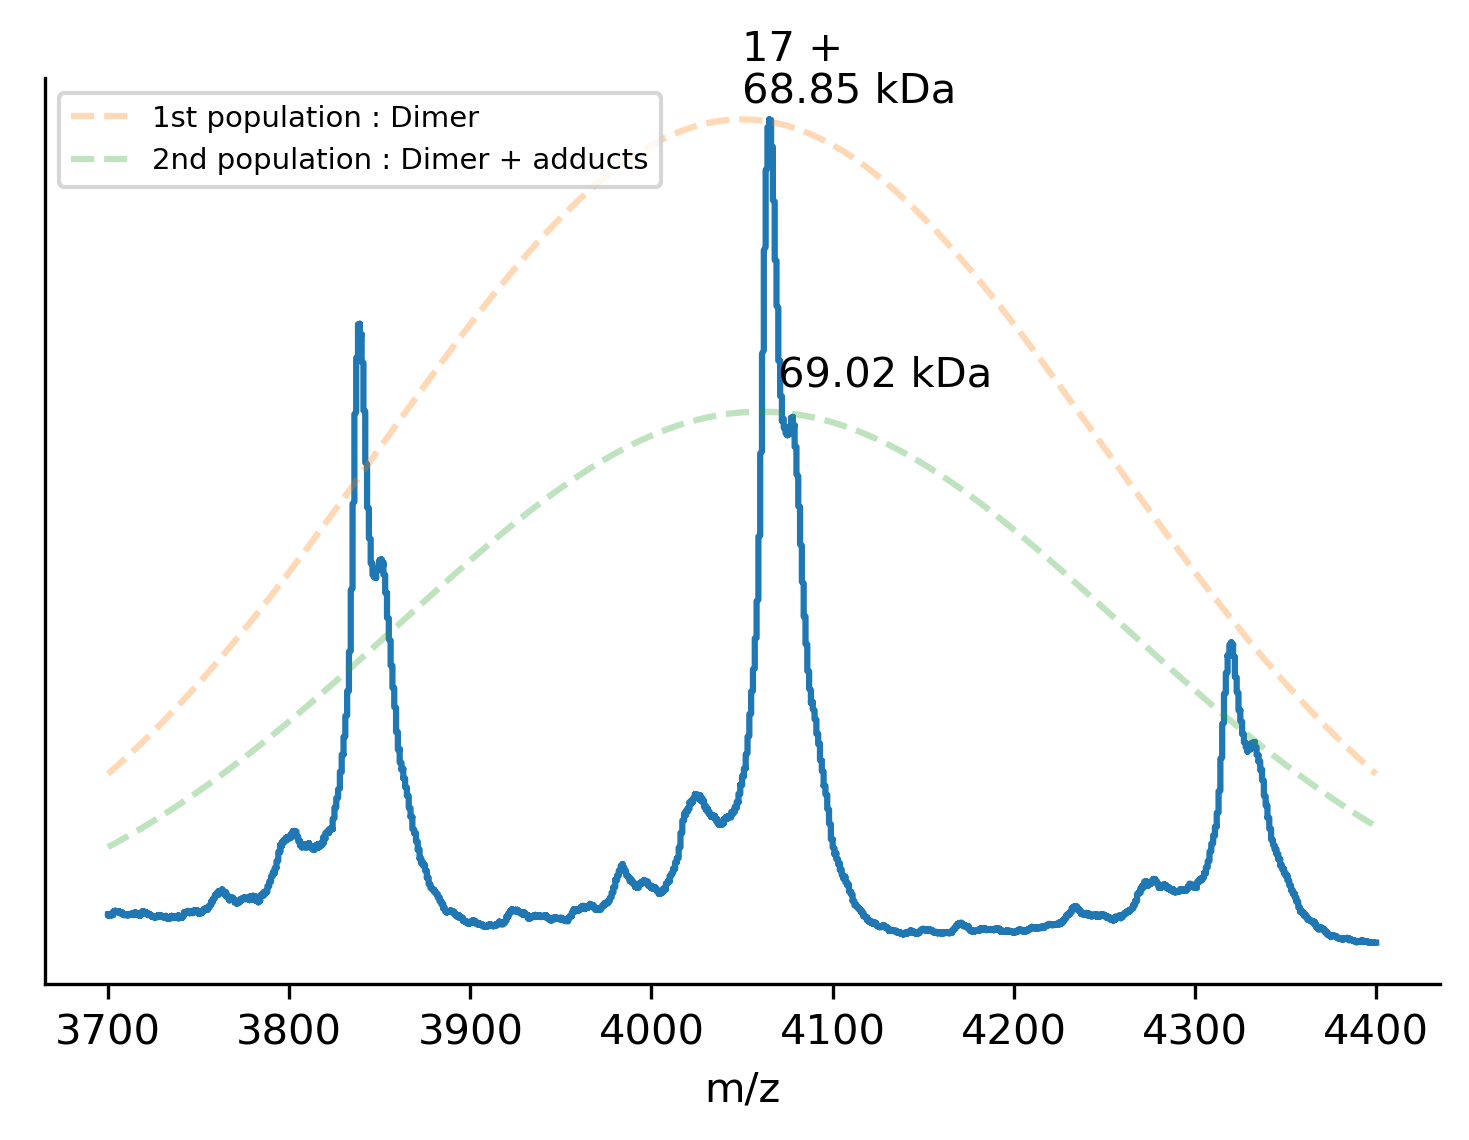

In [56]:
params = [0.8,1,4050,4075,100,200,0.4,0.65,4060,4100,100,200,0.2,0.3,2350,2400,200,400,0,0.1]
fit_dim = fitting(luk_dim,params)

charge_state= round(4066/(4310-4066))
print(charge_state)

plt.plot(luk_dim.x,(luk_dim.y/max(luk_dim.y))*100)
plt.plot(luk_dim.x,gaussian(luk_dim.x,fit_dim[0],fit_dim[1],fit_dim[2],0)*100,'--',label="1st population : Dimer",alpha=0.3)
plt.plot(luk_dim.x,gaussian(luk_dim.x,fit_dim[3],fit_dim[4],fit_dim[5],0)*100,'--',label="2nd population : Dimer + adducts",alpha=0.3)
plt.text(fit_dim[1],102,str(round((fit_dim[1]*charge_state)/1000,2))+' kDa')
plt.text(fit_dim[4]+10,68,str(round((fit_dim[4]*charge_state)/1000,2))+' kDa')
plt.text(fit_dim[1],107,str(charge_state)+' +')


plt.xlabel("m/z")
plt.yticks([])
#plt.ylabel("Abundance (%)")
plt.legend(loc='upper left',prop={'size': 7})
#plt.savefig("plots/luk_dim.svg")

plt.show()

# LukE + peptide

In [29]:
df5 = pd.read_csv("data/LukE_Ligand_smooth40.txt",sep="\t")

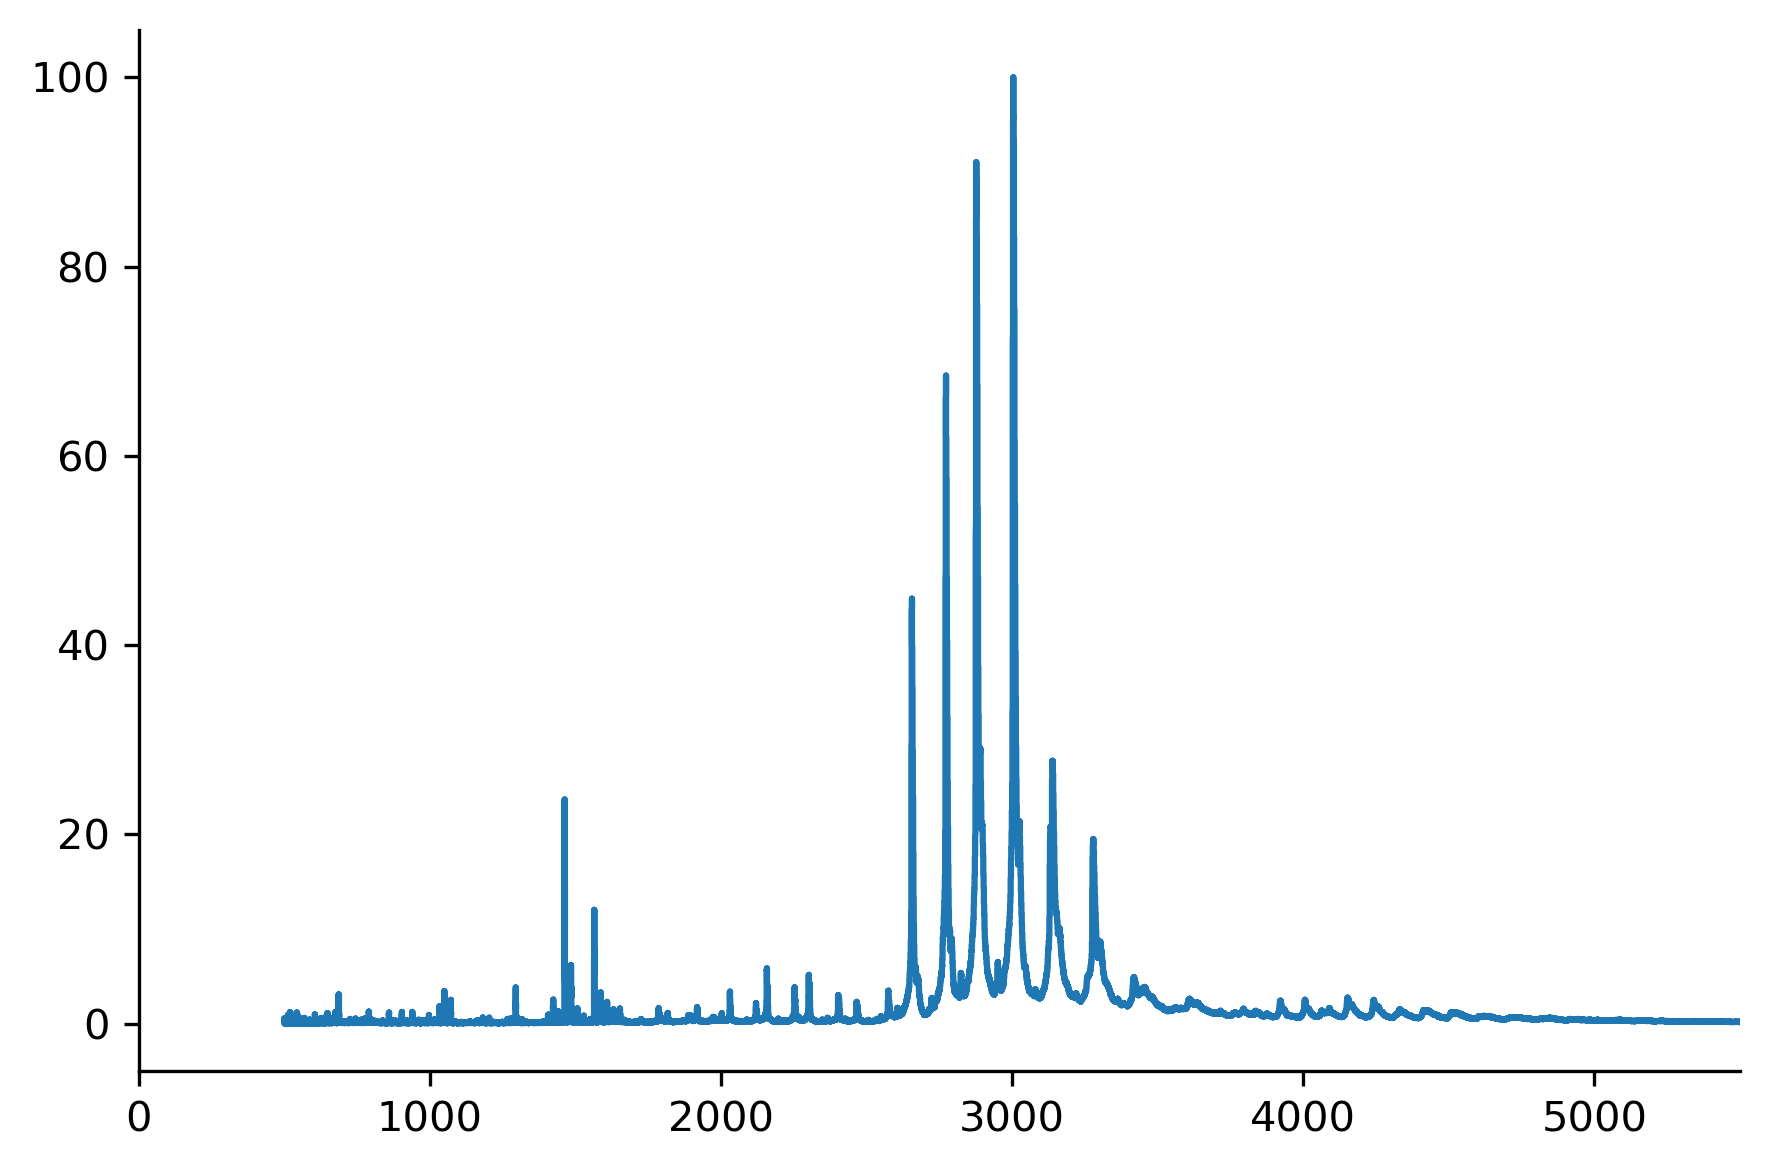

In [30]:
plt.plot(df5.x,df5.y/np.max(df5.y)*100)
plt.tight_layout()
plt.xlim(0,5500)
plt.show()

2 population visible but in reality 3 populations


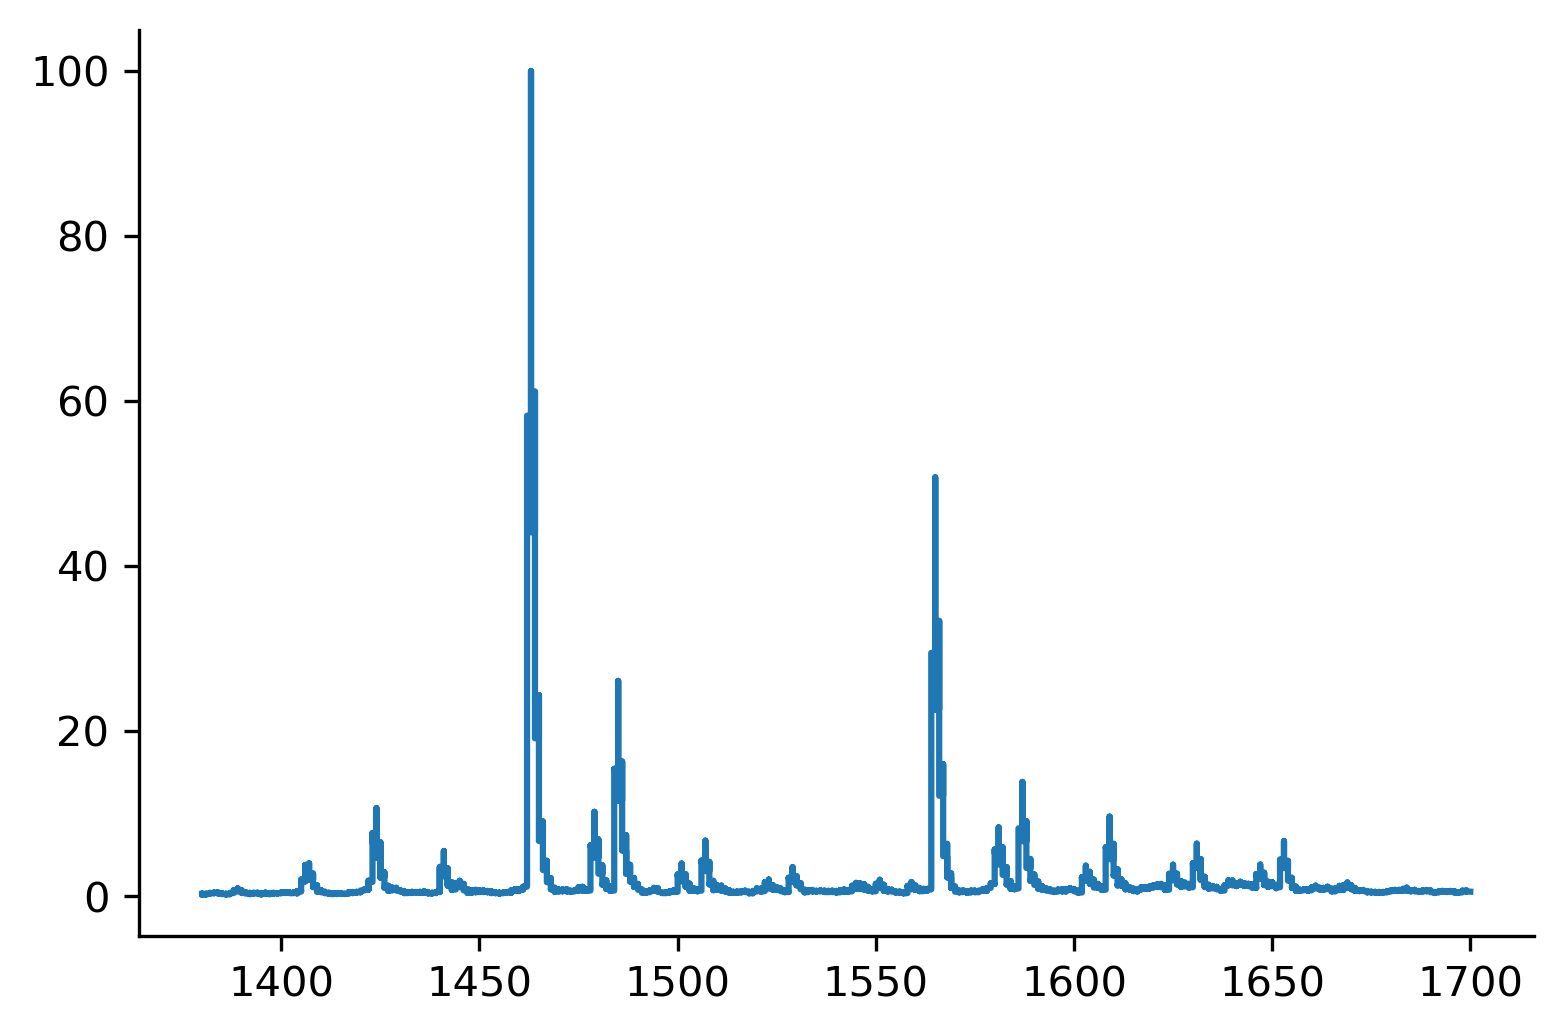

In [31]:
pept = df5.truncate(before=df5[df5['x']==1380].index.values[0],after=df5[df5['x']==1700].index.values[0])

plt.plot(pept.x,pept.y/max(pept.y)*100)

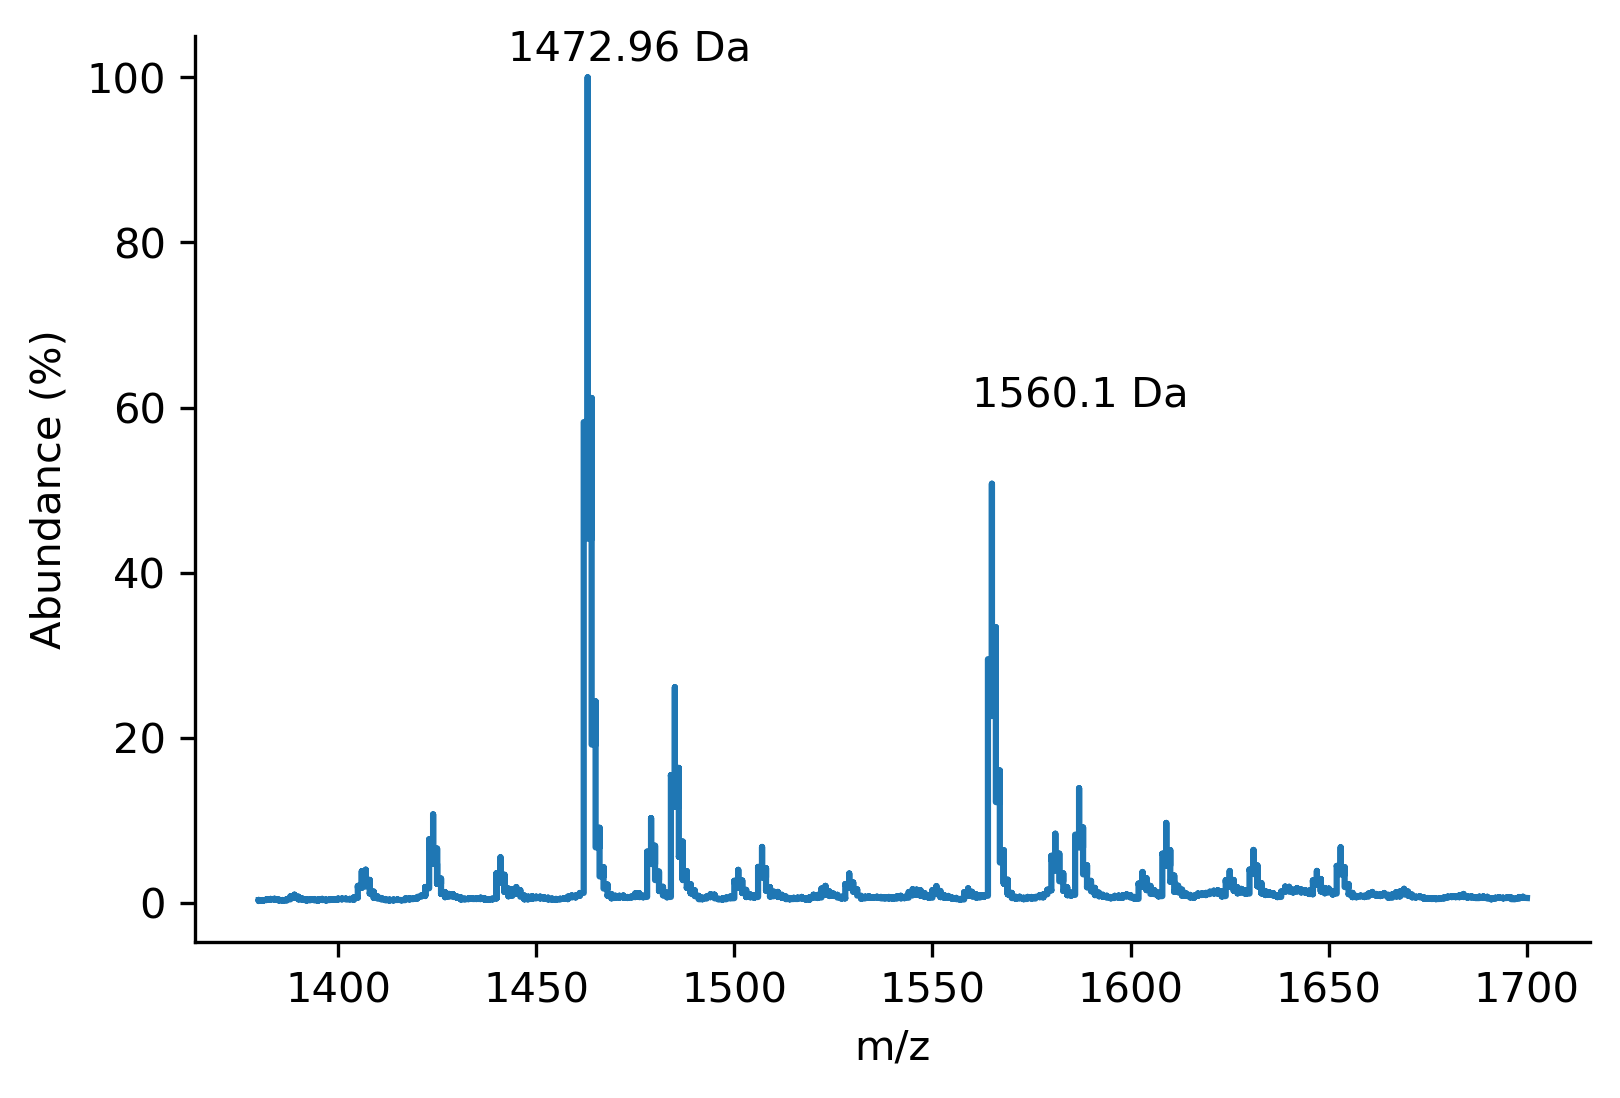

In [36]:
params = [0.8,1,1450,1480,20,50,0.4,0.7,1560,1580,20,50,0.2,0.3,2350,2400,200,400,0,0.1]
fit_pept = fitting(pept,params)

plt.plot(pept.x,(pept.y/max(pept.y))*100)
#plt.plot(pept.x,gaussian(pept.x,fit_pept[0],fit_pept[1],fit_pept[2],0)*100,'--',label="1st population : Peptide hydrolyzed",alpha=0.3)
#plt.plot(pept.x,gaussian(pept.x,fit_pept[3],fit_pept[4],fit_pept[5],0)*100,'--',label="2nd population : Peptide",alpha=0.3)
plt.text(fit_pept[1]-30,102,str(round((fit_pept[1]*1),2))+' Da')
plt.text(fit_pept[4],60,str(round((fit_pept[4]*1),2))+' Da')

plt.xlabel("m/z")
plt.ylabel("Abundance (%)")
#plt.legend(loc='upper right',prop={'size': 7})
plt.savefig("plots/pept_bis.svg")

plt.show()

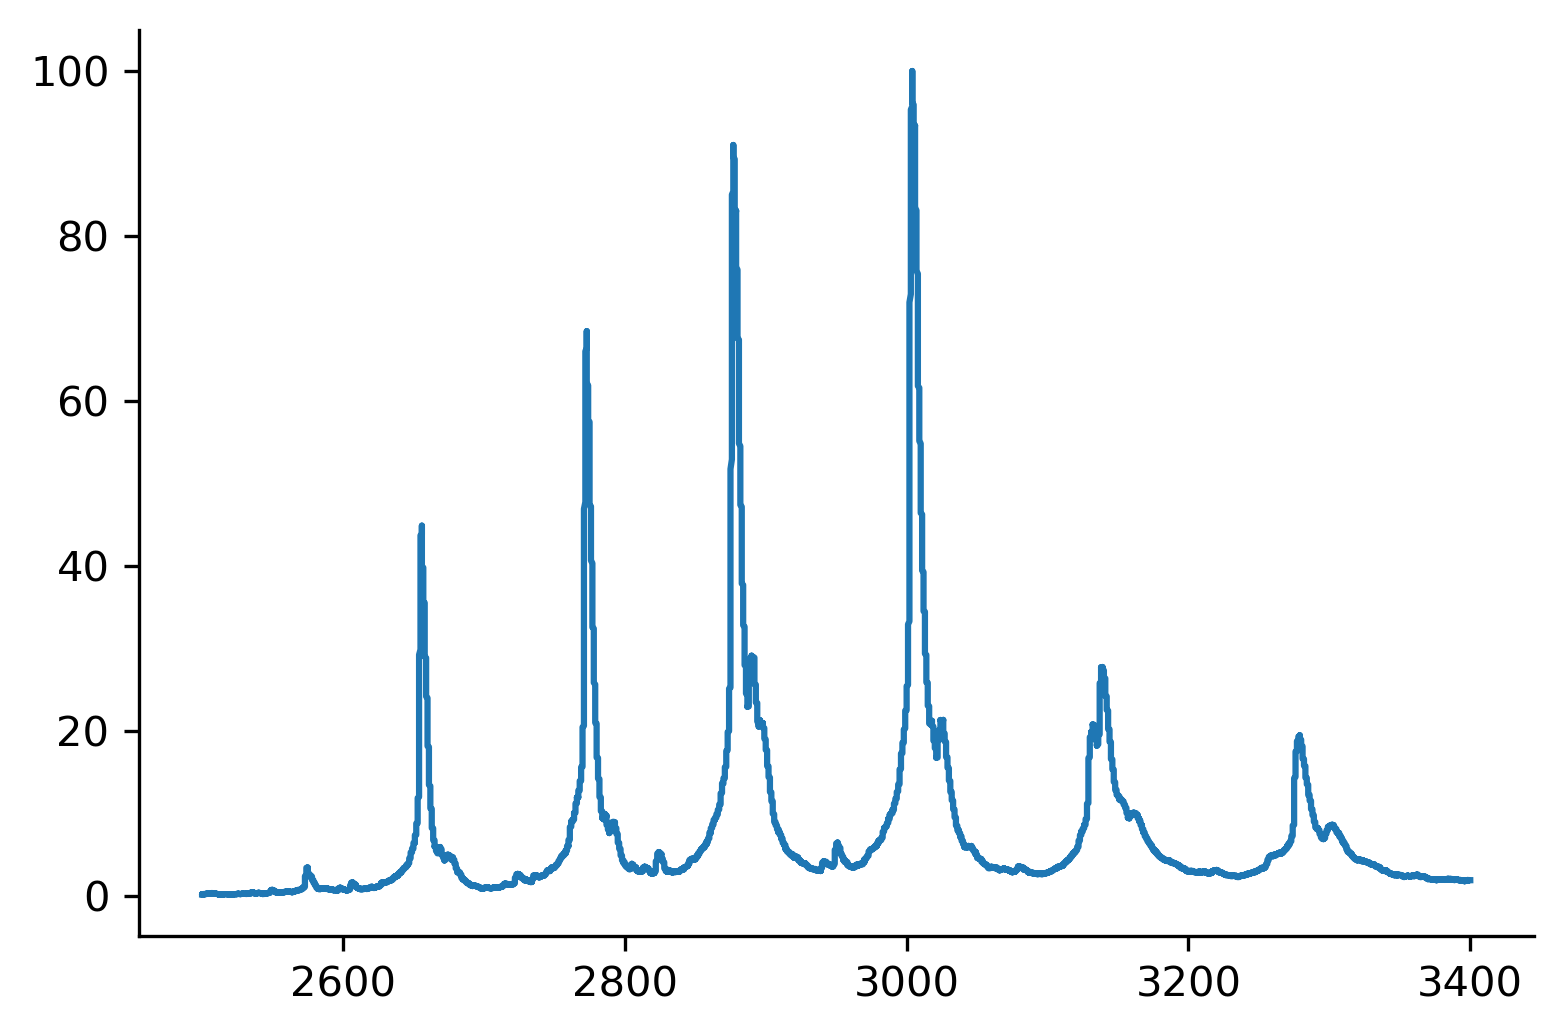

In [38]:
mono = df5.truncate(before=df5[df5['x']==2500].index.values[0],after=df5[df5['x']==3400].index.values[0])

plt.plot(mono.x,mono.y/max(mono.y)*100)

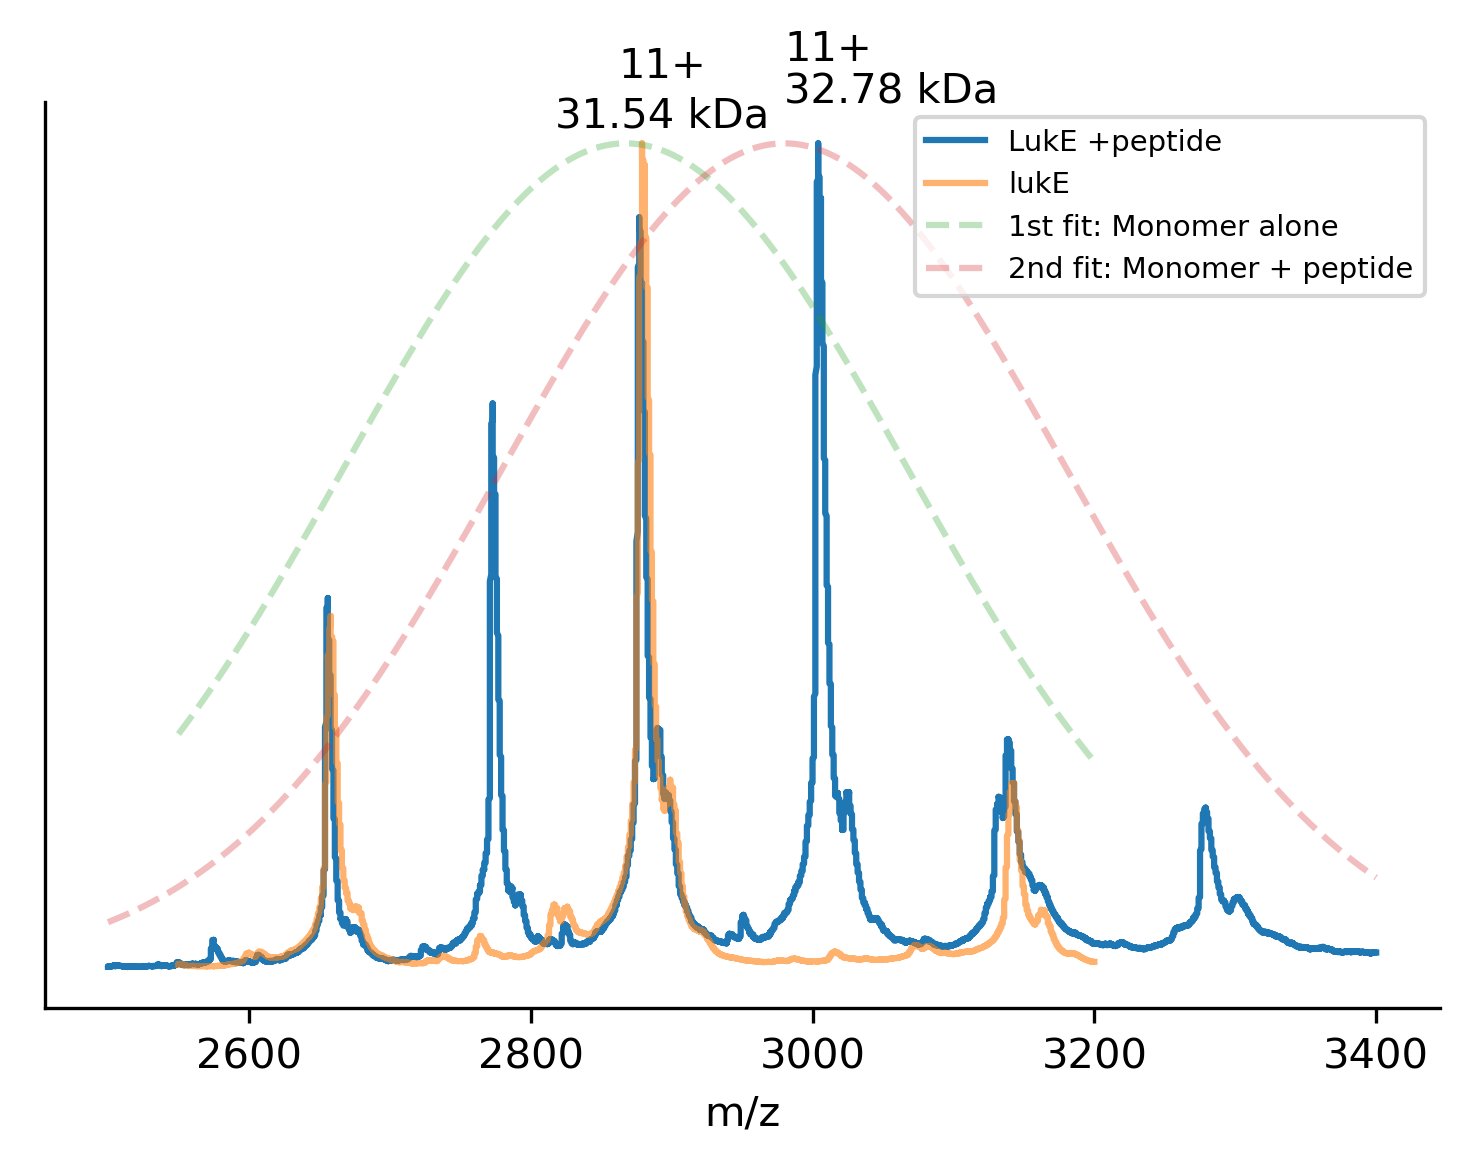

In [63]:
params = [0.8,1,2850,2900,100,200,0.8,1,2980,3010,100,200,0.2,0.3,2350,2400,200,400,0,0.1]
fit_mono = fitting(mono,params)

charge_state = 11 

plt.plot(mono.x,(mono.y/max(mono.y))*100,label='LukE +peptide')
plt.plot(luk_mono_2.x,(luk_mono_2.y/max(luk_mono_2.y))*100,label='lukE',alpha=0.6)


plt.plot(luk_mono_2.x,gaussian(luk_mono_2.x,fit_mono_2[0],fit_mono_2[1],fit_mono_2[2],0)*100,'--',label="1st fit: Monomer alone",alpha=0.3)
plt.text(fit_mono_2[1]-50,102,str(round((fit_mono_2[1]*charge_state )/1000,2))+' kDa')
plt.plot(mono.x,gaussian(mono.x,fit_mono[3],fit_mono[4],fit_mono[5],0)*100,'--',label="2nd fit: Monomer + peptide",alpha=0.3)
plt.text(fit_mono[4],105,str(round((fit_mono[4]*charge_state )/1000,2))+' kDa')

plt.text(fit_mono_2[1]-5,108,str(charge_state)+'+')
plt.text(fit_mono[4],110,str(charge_state)+'+')



plt.xlabel("m/z")
#plt.ylabel("Abundance (%)")
plt.yticks([])
plt.legend(loc='upper right',prop={'size': 7})
#plt.savefig("plots/mono_pept.svg")

plt.show()

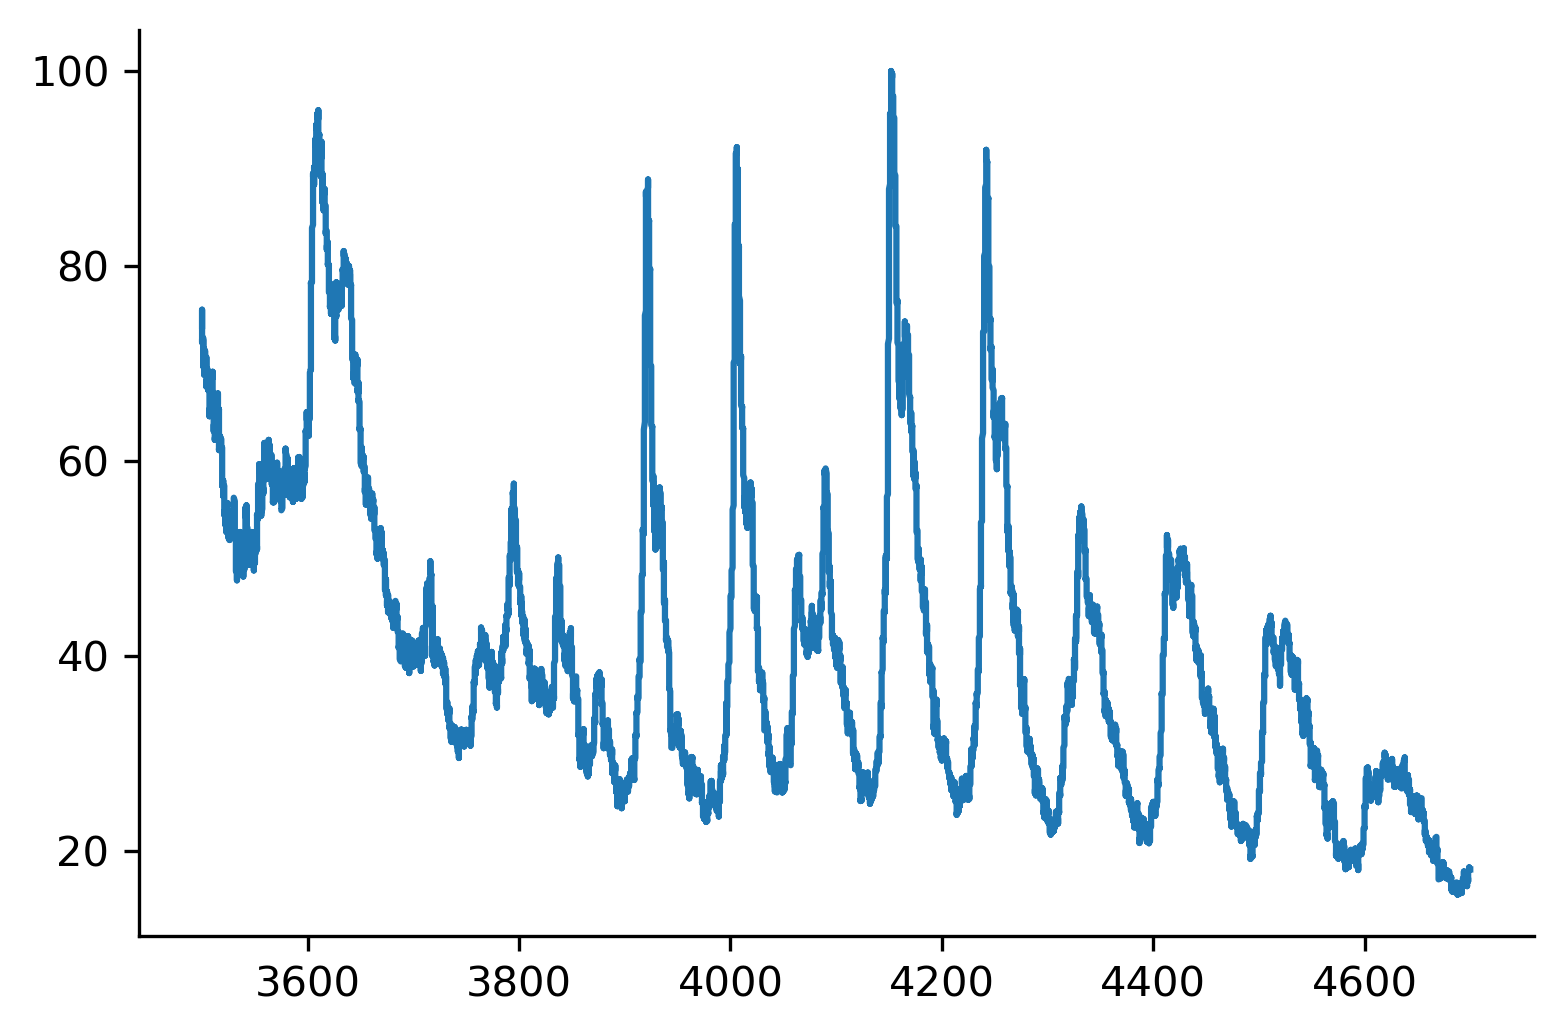

In [45]:
dim_pept = df5.truncate(before=df5[df5['x']==3500].index.values[0],after=df5[df5['x']==4700].index.values[0])

plt.plot(dim_pept.x,dim_pept.y/max(dim_pept.y)*100)

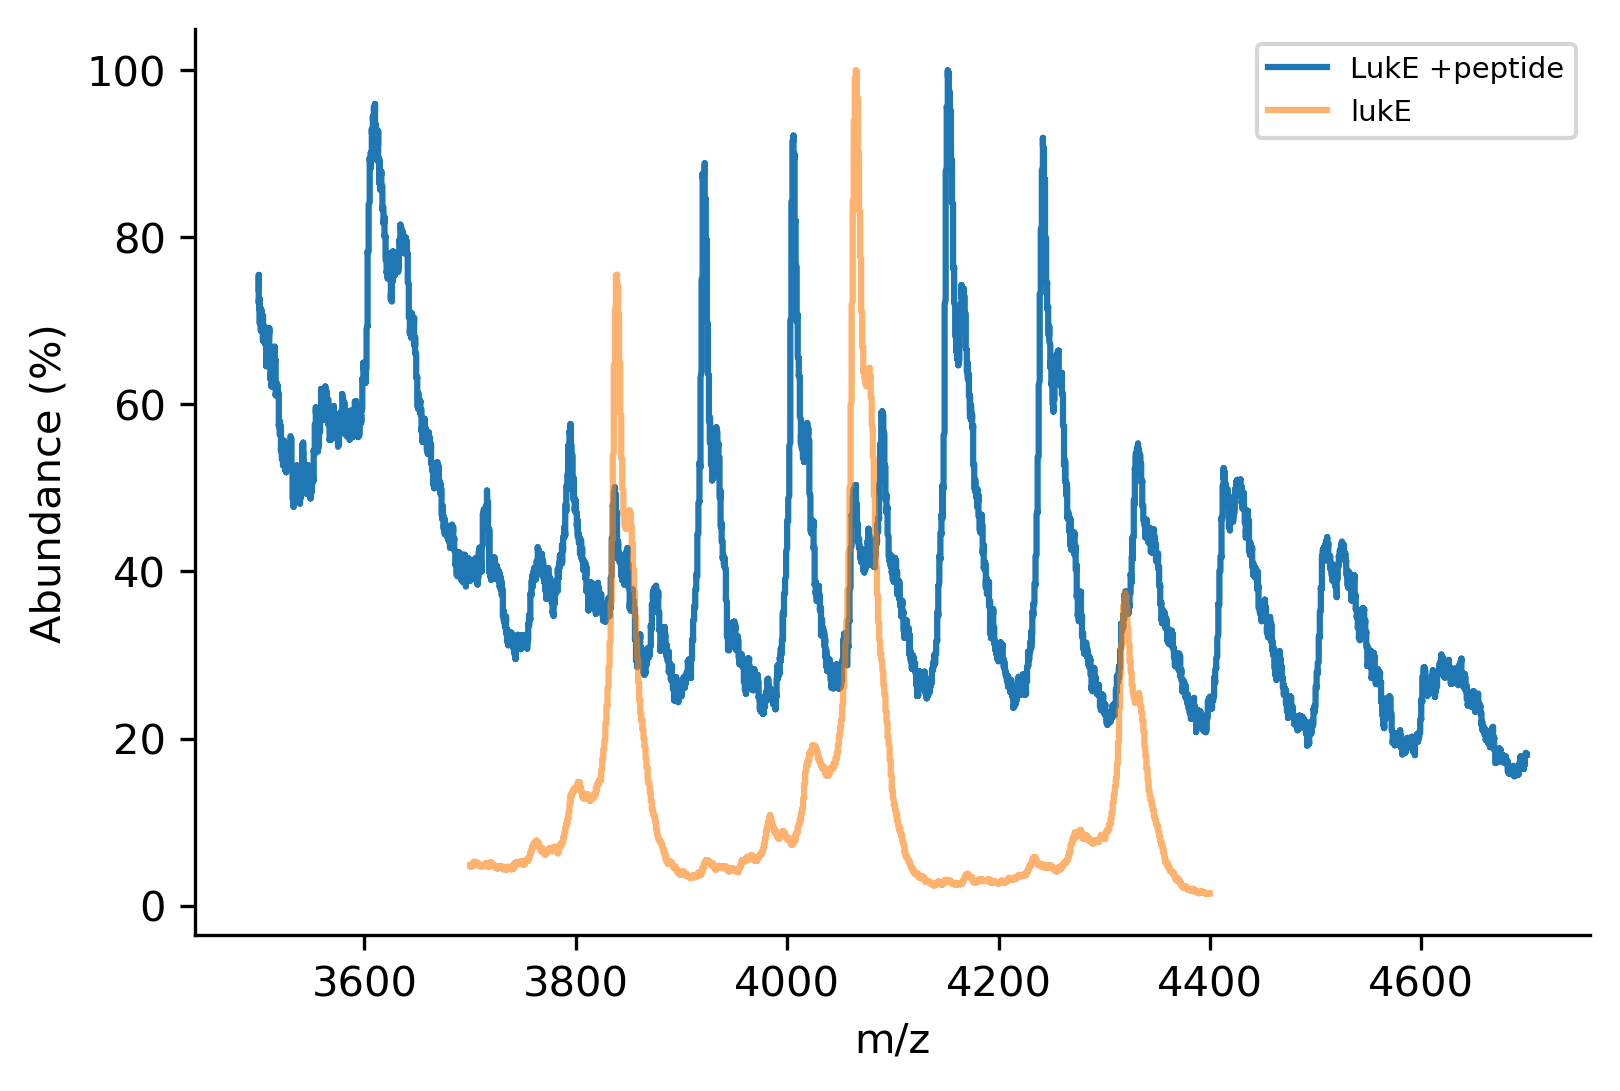

In [80]:
params = [0.2,0.3,2350,2400,200,400,0.8,1,4100,4190,100,200,0.8,1,4200,4250,100,200,0,0.1]
fit_dim_pept = fitting(dim_pept,params)

# plot the raw data
plt.plot(dim_pept.x,(dim_pept.y/max(dim_pept.y))*100,label='LukE +peptide')
plt.plot(luk_dim.x,(luk_dim.y/max(luk_dim.y))*100,label='lukE',alpha=0.6)

#fit of the dimer alone
#plt.plot(luk_dim.x,gaussian(luk_dim.x,fit_dim[0],fit_dim[1],fit_dim[2],0)*100,'--',label="1st population : Dimer",alpha=0.3)
#plt.text(fit_dim[1],102,str(round((fit_dim[1]*12)/1000,2))+r' $\pm$ '+str(round((fit_dim[2]*12)/1000))+' kDa')

# fit of the dimer + pept
#plt.plot(dim_pept.x,gaussian(dim_pept.x,fit_dim_pept[3],fit_dim_pept[4],fit_dim_pept[5],0)*100,'--',label="2nd fit: dim_peptmer + peptide",alpha=0.3)
#plt.text(fit_dim_pept[4],105,str(round((fit_dim_pept[4]*12),2))+r' $\pm$ '+str(round((fit_dim_pept[5])/1000,2))+' Da')

# fit of the dimer + 2pept
#plt.plot(dim_pept.x,gaussian(dim_pept.x,fit_dim_pept[6],fit_dim_pept[7],fit_dim_pept[8],0)*100,'--',label="2nd fit: dim_peptmer + peptide",alpha=0.3)
#plt.text(fit_dim_pept[7],105,str(round((fit_dim_pept[7]*12),2))+r' $\pm$ '+str(round((fit_dim_pept[8])/1000,2))+' Da')


plt.xlabel("m/z")
plt.ylabel("Abundance (%)")
plt.legend(loc='upper right',prop={'size': 7})
#plt.savefig("plots/dim_pept.svg")

plt.show()

In [17]:
figure(figsize= [5, 2])

popt, pcov = curve_fit(three_gaussians, df5.x, df5.y/np.max(df5.y)*100,
                       bounds=([0.20, 1200, 200, 0.8, 2900, 200, 0.3, 5000,200, 0],
                               [0.35, 1500, 400, 1, 3200, 400, 0.5, 5400,400, 0.1]))

<Figure size 1500x600 with 0 Axes>

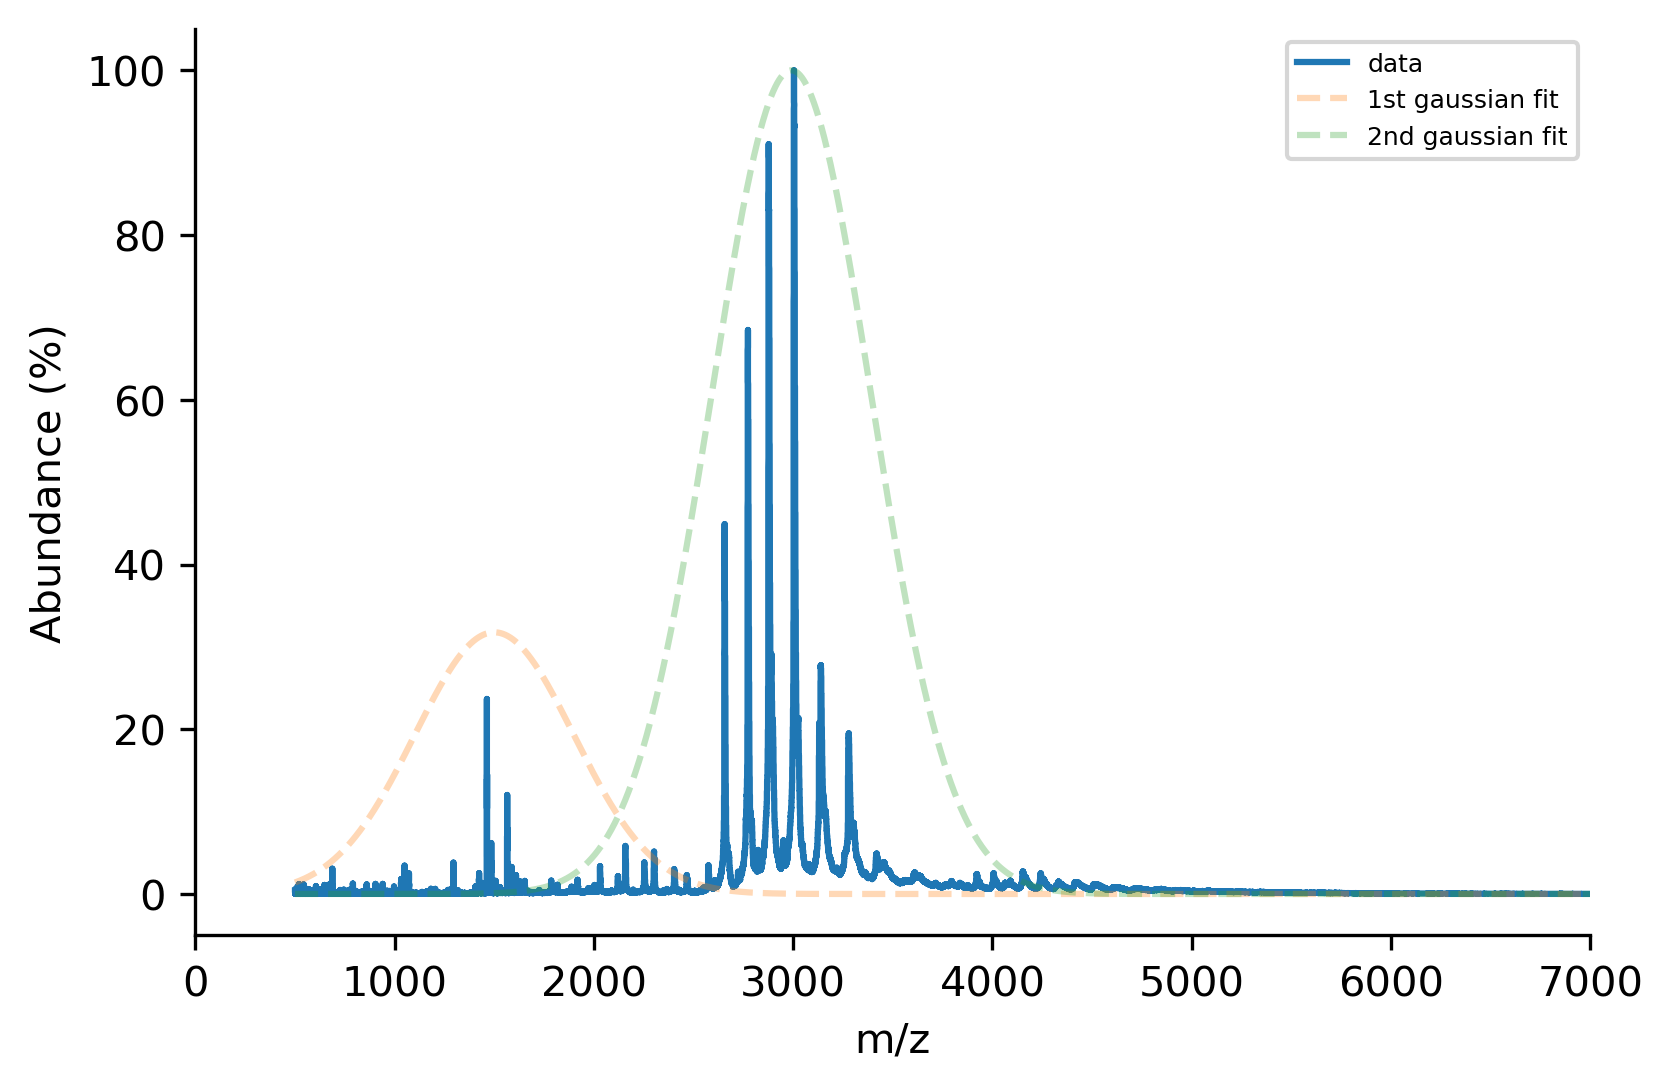

In [18]:

plt.plot(df5.x,(df5.y/np.max(df5.y))*100,label="data")
plt.plot(df5.x,gaussian(df5.x,popt[0],popt[1],popt[2],0)*100,'--',label="1st gaussian fit",alpha=0.3)
plt.plot(df5.x,gaussian(df5.x,popt[3],popt[4],popt[5],0)*100,'--',label="2nd gaussian fit",alpha=0.3)
#plt.plot(df5.x,gaussian(df5.x,popt[6],popt[7],popt[8],0)*100,'--',label="3rd gaussian fit",alpha=0.3)
plt.legend(loc="best",prop={'size': 6})
plt.xlim(0,7000)
plt.xlabel("m/z")
plt.ylabel("Abundance (%)")
#plt.savefig('plots/LukE+peptide.png')
plt.show()

## Crop the dataframe to see the 4000 region (dimer)

In [19]:
print(df5[df5['x']==5000].index.values) #find the index of the row at which we are at 5000 m/z to truncate the dataframe and readjust scale

[220936 220937 220938 220939 220940 220941 220942 220943 220944 220945
 220946 220947 220948 220949 220950 220951 220952 220953 220954 220955
 220956 220957 220958 220959 220960 220961 220962 220963 220964 220965
 220966 220967]


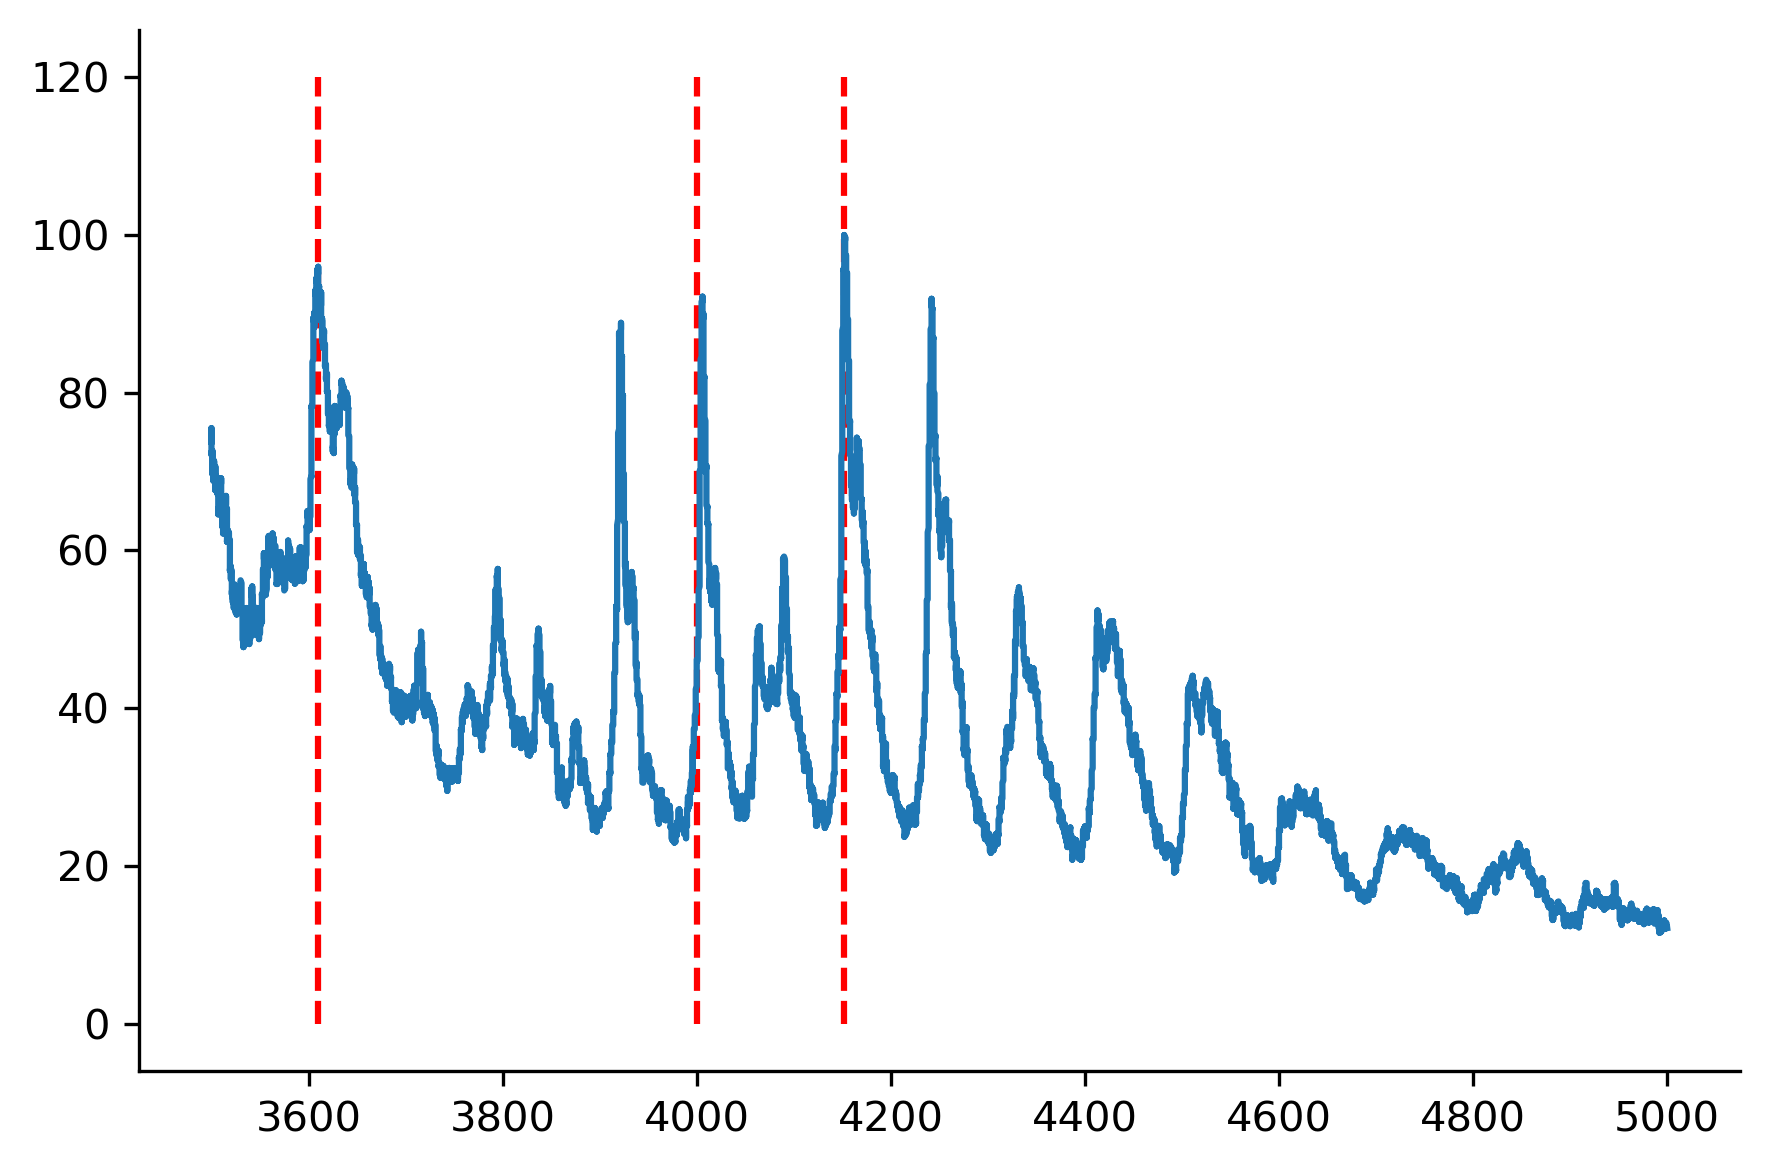

In [28]:
df6 = df5.truncate(before=168027,after=220936)
plt.plot(df6.x,df6.y/np.max(df6.y)*100)
plt.vlines(4000,0,120,linestyles='--',color='r')
plt.vlines(4152,0,120,linestyles='--',color='r')
plt.vlines(3610,0,120,linestyles='--',color='r')

plt.tight_layout()
plt.show()

In [46]:
popt, pcov = curve_fit(three_gaussians, df6.x, df6.y/np.max(df6.y)*100,
                       bounds=([0.80, 3580, 200, 0.8, 3900, 200, 0.8, 4100,200, 0],
                               [1, 3620, 400, 1, 4010, 400, 1, 4200,400, 0.1]))

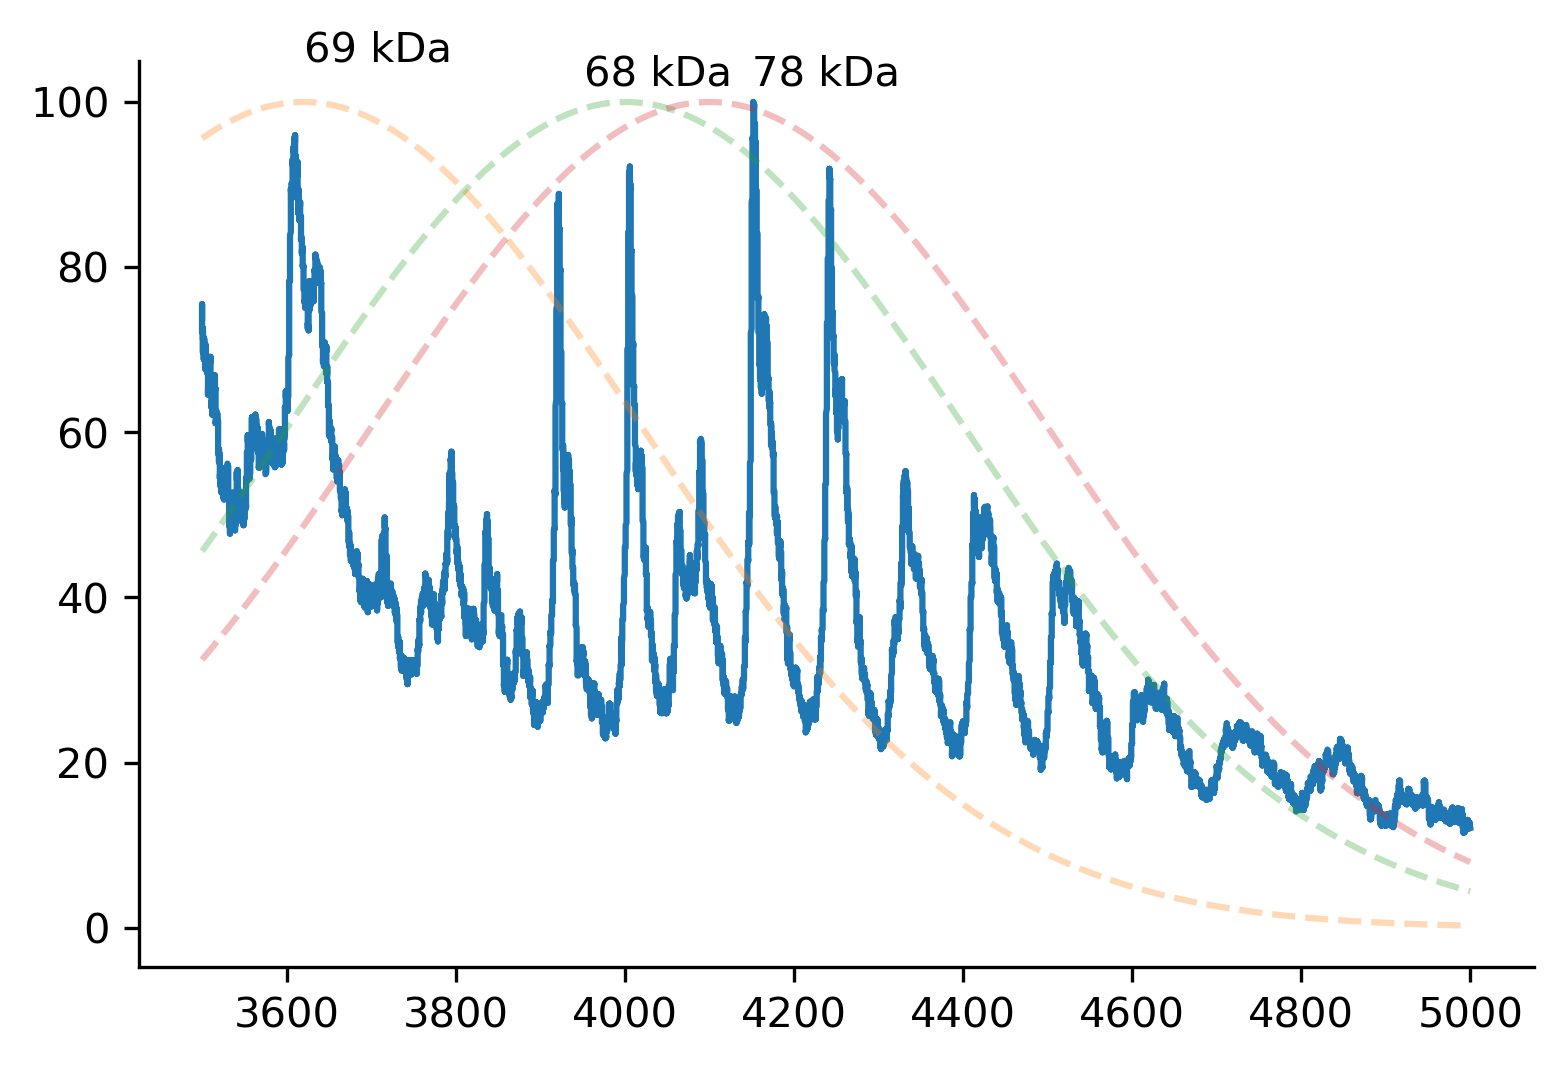

In [49]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams["figure.dpi"] = 300


plt.plot(df6.x,df6.y/np.max(df6.y)*100)

plt.plot(df6.x,gaussian(df6.x,popt[0],popt[1],popt[2],0)*100,'--',label="1st population : Monomer ",alpha=0.3)
plt.plot(df6.x,gaussian(df6.x,popt[3],popt[4],popt[5],0)*100,'--',label="2nd population : Dimer",alpha=0.3)
plt.plot(df6.x,gaussian(df6.x,popt[6],popt[7],popt[8],0)*100,'--',label="3rd population : Tetramer",alpha=0.3)


plt.text(popt[1],105,str(round((popt[1]*19)/1000))+' kDa')
plt.text(popt[4]-50,102,str(round((popt[4]*17)/1000))+' kDa')
plt.text(popt[7]+50,102,str(round((popt[7]*19)/1000))+' kDa')




#plt.savefig('plots/lukE+peptide_dimer.png')
plt.show()

## Things to optimize

- The functions should be defined first and all the analysis could be done automatically
- The plotting could also be automatized as it is always similar
- find a way to have a standard deviation measure
- find a way to compute the mass by taking the average of all the peaks present in the distribution and not only the peak under the mean
